<a href="https://colab.research.google.com/github/pranjal299/cv-project/blob/main/CS_ECE_5824_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS-5824 / Advanced Machine Learning
# Assignment 2 [ 100 Points ]

In this assignment, **you need to complete three sections** which are based on:

1. Gaussian Mixture Models (GMM)
2. Deep Learning
3. Generative Adversarial Networks (GANs)

## Submission guideline

1. Click the Save button at the top of the Jupyter Notebook.
2. Please make sure to have entered your Virginia Tech PID below.
3. Select Edit -> Clear All Output. This will clear all the outputs from all cells (but will keep the content of ll cells).
4. Select Runtime -> Restart and Run All. This will run all the cells in order.
5. Once you've rerun everything, select File -> Print -> Save as PDF
6. Look at the PDF file and make sure all your solutions are there, displayed correctly. 
7. Upload **both** the PDF file and this notebook.
8. Please **DO NOT** upload any data.

### Please Write Your VT PID Here: pranjalranjan@vt.edu

Import some neccesary packages 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Section 1: Gaussian Mixture Models (GMMs) for Image Generation [ 20 points ]


In this section, you are asked to use GMM as a generative model in order to create new samples from the distribution defined by the input data. Specifically, you will generate a new sample of 100 handwritten digits from the standard [digits corpus](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits). Each sample from the corpus is an $8 \times 8$ grayscale image of a digit between $0$ to $9$, with a label telling us which digit the image represents. The dataset is conveniently [provided by SciKit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits).

We first load the data from `sklearn` as follows:

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

We also provide code to visualize the digits data:



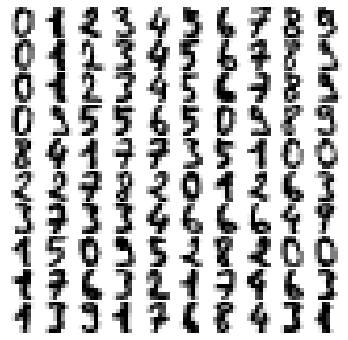

In [ ]:
import math

def show_digits(data, num_images, ncols, size=(8, 8)):
    nrows = math.ceil(num_images / ncols)
    fig, ax = plt.subplots(nrows, ncols, figsize=(6, 6))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        if i < num_images:
            im = axi.imshow(data[i].reshape(*size), cmap="binary")
        axi.axis("off")

show_digits(digits.data, 100, 10)

## 1.1. Dimensionality reduction with PCA [ 5 points ]

The images have size $8 \times 8 = 64$, which is a high enough dimensional space that GMMs may have troubles converging. We thus want to use an invertible dimensionality reduction algorithm such as [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on our data. Let's apply a straightforward PCA on our data, asking it to preserve 99% of the variance within the data. This will hopefully reduce the dimensionality by a good amount, while practically changing none of our data. Use `5824` as the random_state. You should obtain `41` as the reduced dimensionality.

In [ ]:
# TODO: Your code here
from sklearn.decomposition import PCA

data = digits.data

pca = PCA(n_components = 0.99, random_state=5824)

pca.fit(data)
data = pca.transform(data)

data.shape

(1797, 41)

## 1.2. Akaike Information Criterion (AIC) for mixture components selection [ 5 points ]

AIC is a metric that can be used to estimate the prediction error, and thus the quality of a statistical model for a given dataset. We can obtain this result by invoking the `aic()` method in SciKit-Learn's [`GaussianMixture` class](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) on our data. In the following cell, you should perform a search to explore the AIC values as returned when we fit our Gaussian Mixture models with a (liberal) range of mixture component counts. The optimal value should be low, since AIC indicates an error.

In [ ]:
# TODO: Your code here

from sklearn import mixture

n_components_range = range(1, 300)
best_aic = np.infty
best_n_components = 0

for n_components in n_components_range:
  gmm = mixture.GaussianMixture(n_components=n_components,random_state=5824)
  gmm.fit(data)
  aic = gmm.aic(data)
  if aic < best_aic:
    best_aic = aic
    best_n_components = n_components

print(best_n_components, best_aic)

177 -193069.84239567054


## 1.3. Fit model [ 5 points ]

With the optimal number of mixture components, fit a Gaussian mixture model on the reduced-dimensionality data. You can check whether or not the model has converged using its `.converged_` attribute, which is a boolean indicated whether convergence has been reached during fitting.

In [ ]:
# TODO: Your code here
gmm = mixture.GaussianMixture(n_components=best_n_components,random_state=5824)
gmm.fit(data)
gmm.converged_

True

## 1.4. Generate new images [ 5 points ]

With your Gaussian mixture model ready, you can now draw new samples from your learned distribution, which represent new images you will be generating. The steps for this process are as follows:

1. Draw $100$ samples from the Gaussian mixture model
2. Since our samples are in the reduced dimensionality space, use PCA to transform them back into our original dimension of $8 \times 8$
3. Display the generated images using `show_digits()`

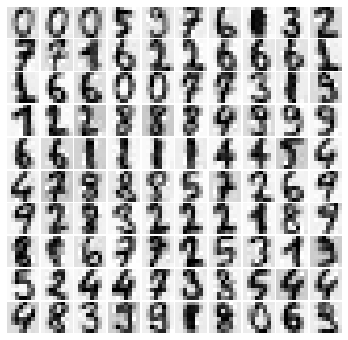

In [ ]:
# TODO: Your code here
generated_data = gmm.sample(100)[0]
generated_data = pca.inverse_transform(generated_data)
show_digits(generated_data,100,10)

#Section 2. Deep Learning [ 40 points ]

## 2.1. Stochastic Gradient Descent (SGD) [ 10 points ]
Stochastic Gradient Descent works almost the same as normal Gradient Descent (also called Batch Gradient Descent), but instead of training on the algorithm on entire dataset, it picks only one sample to update the model parameters, which makes it much faster. 

As a preparatory exercise, in this section, we ask you to write a stochastic gradient descent function from scratch. Specifically we would like you to write and test it on a linear regression data which will be provided below. The function should take in X, y, learning rate, epoch, and batch_size as input and return the model parameters m (slope) and b (intercept). 



### 2.1.1. Implement SGD function [ 5 points ]

The SGD function will be tested on the data that we have prepared for you below.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X1 = X['MedInc']

In [ ]:
#Implement SGD below
def SGD(X, y, lr=0.05, epoch=10, batch_size=1):
        
    '''
    Stochastic Gradient Descent for a single feature
    '''
    
    m, b = 0.5, 0.5 # initial parameters
    # TODO: Your code here

    for i in range(epoch):
      idx = np.random.randint(0,len(X),batch_size)
      X_batch = np.take(X,idx)
      y_batch = np.take(y,idx)

      v = y_batch - (m*X_batch + b)

      m = m - lr * (-2 * X_batch.dot(v).sum()/len(X_batch))
      b = b - lr * (-2 * v.sum()/len(X_batch))
        
    return m, b

### 2.1.2. Apply the SGD to obtain parameters and MSE [5 points ]

Now, appply the SGD function that you built on a regression data. 
<br>


In [ ]:
#Apply the SGD function to obtain m and b. Use lr = 0.01, epoch = 100, and batch_size = 2

# TODO: Your code here
m, b = SGD(X1,y,0.01,100,2)

In [ ]:
#Obtain MSE

# TODO: Your code here
y_p = m*X1 + b
mean_squared_error(y, y_p)

0.7013329675934876

You ahould expect to see MSE as 0.7011.

## 2.2. Multilayer Perceptrons (MLPs) [ 20 points ]
In this assignment, you are asked to use either Pytorch or Keras and Tensorflow to implement MLPs and evaluate the performance of MLPs for multiclass classification.

### Problem 1 [ 10 points ]
>In this section, you will need to implement feedforward neural networks, i.e., MLPs, for class identification using the **CIFAR10** and **CIFAR100** datasets.

CIFAR-10 and CIFAR-100 are labeled subsets of the 80 million tiny images dataset. They were collected by *Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.* The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. You can learn more about the dataset using this link: https://www.cs.toronto.edu/~kriz/cifar.html.

>**Hint:** The intensity of images should be scaled from [0, 255] to [0.0, 1.0], i.e., the pixel value is normalized to avoid large gradient values that could make training difficult. The label/class variable should be converted to one-hot vector, a vector with all elements 0, except for the index of the specified class. The loss function for one-hot vector is termed `categorical_crossentropy` in Keras/Tensorflow.

The MLP model shown below can be used for multiclass classification. The output layer consists of `num_classes` nodes with softmax activation function.

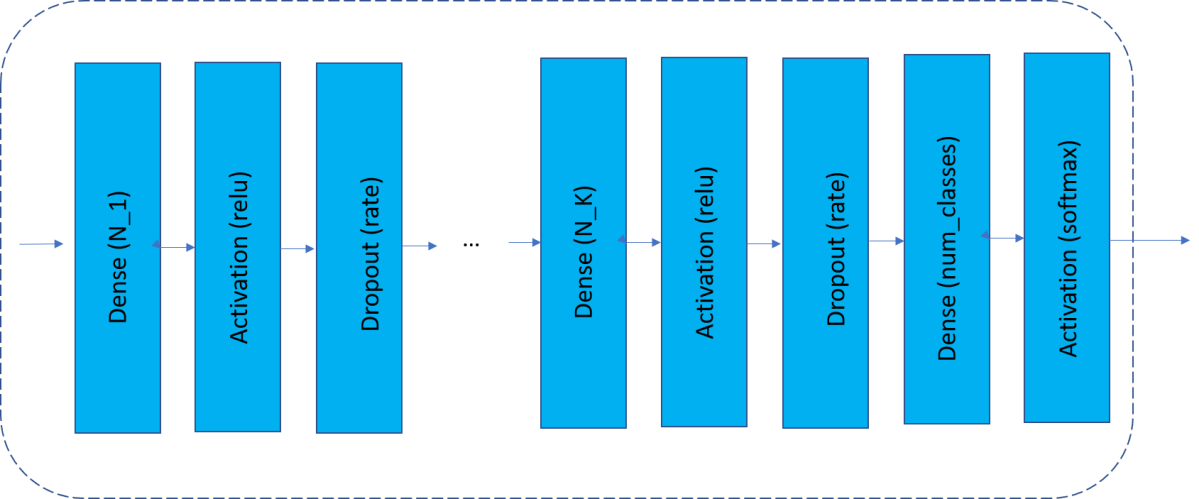

In [ ]:
# If using keras, you can load CIFAR-10 as below (CIFAR-100 can be loaded in similar way):
import numpy as np
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical  
from keras.layers import Input, Flatten, Dense, Activation, Dropout, Conv2D, MaxPooling2D, concatenate
from keras.models import Model, Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import load_model

(X_train, y_train), (X_test, y_test) = cifar10.load_data()


X_train = (X_train / 255).astype(np.float32)
X_test = (X_test / 255).astype(np.float32)
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

In [ ]:
# TODO: Your code here

def create_model(input_shape, num_classes, nodes, dropout_rate, optimizer):
  X_input = Input(input_shape)
  X = Flatten()(X_input)
  for n in nodes:
    X = Dense(n,activation='relu')(X)
    X = Dropout(dropout_rate)(X)
  X = Dense(num_classes,activation='softmax')(X)
  model = Model(inputs=X_input, outputs = X)
  model.compile(optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
model = create_model(X_train[0].shape, y_train.shape[1], nodes = [64], dropout_rate = 0, optimizer = 'adam')
checkpoint = ModelCheckpoint('model.h5', save_best_only=True,monitor='val_accuracy',verbose=1)
earlystopper = EarlyStopping(patience = 15,monitor='val_accuracy',verbose=1)
history = model.fit(x=X_train, y=y_train, batch_size = 4096, epochs = 200, validation_data = (X_test, y_test), callbacks = [checkpoint, earlystopper],verbose='auto')
model = load_model('model.h5')
print('Test acc (%) - ',model.evaluate(X_test,y_test,verbose=0)[1]*100)

Epoch 1/200
11/13 [========================>.....] - ETA: 0s - loss: 2.5200 - accuracy: 0.1334
Epoch 1: val_accuracy improved from -inf to 0.17760, saving model to model.h5
13/13 [==============================] - 1s 57ms/step - loss: 2.4933 - accuracy: 0.1380 - val_loss: 2.2382 - val_accuracy: 0.1776
Epoch 2/200
11/13 [========================>.....] - ETA: 0s - loss: 2.2068 - accuracy: 0.1766
Epoch 2: val_accuracy improved from 0.17760 to 0.19090, saving model to model.h5
13/13 [==============================] - 0s 36ms/step - loss: 2.2049 - accuracy: 0.1766 - val_loss: 2.1659 - val_accuracy: 0.1909
Epoch 3/200
12/13 [==========================>...] - ETA: 0s - loss: 2.1493 - accuracy: 0.1982
Epoch 3: val_accuracy improved from 0.19090 to 0.21440, saving model to model.h5
13/13 [==============================] - 0s 36ms/step - loss: 2.1489 - accuracy: 0.1986 - val_loss: 2.1252 - val_accuracy: 0.2144
Epoch 4/200
11/13 [========================>.....] - ETA: 0s - loss: 2.1085 - accurac

### Problem 2 [ 10 points ]

Evaluate the performance of MLPs with (i) **different network** configurations: number of layers (e.g., 2, 3, 4, 5, …) and number of hidden nodes (e.g., 64, 256, 512, …); (ii) **with or without regularization** (i.e., with or without dropout (e.g., dropout rate = 0.2, 0.4, 0.6)); (iii) **different optimizers** (e.g., SGD, Adam, etc.).

Summarize the classification performance (accuracy) in a table and discuss about your understanding of the experimental results in terms of network configurations, dropout and optimization techniques.

In [ ]:
# TODO: Your code here
for layers in [[64]]:
  for dropout in [0,0.2,0.4,0.6]:
    for optimizer in ['adam','SGD']:
      print('Layers : ',layers)
      print('Dropout : ',dropout)
      print('Optimizer : ',optimizer)
      model = create_model(X_train[0].shape, y_train.shape[1], nodes = layers, dropout_rate = 0, optimizer = 'adam')
      checkpoint = ModelCheckpoint('model.h5', save_best_only=True,monitor='val_accuracy',verbose=0)
      earlystopper = EarlyStopping(patience = 20,monitor='val_accuracy',verbose=0)
      history = model.fit(x=X_train, y=y_train, batch_size = 1028, epochs = 200, validation_data = (X_test, y_test), callbacks = [checkpoint, earlystopper],verbose=0)
      print('Test acc (%) - ',model.evaluate(X_test,y_test,verbose=0)[1]*100)
      print()

Layers :  [64]
Dropout :  0
Optimizer :  adam
Test acc (%) -  40.380001068115234

Layers :  [64]
Dropout :  0
Optimizer :  SGD
Test acc (%) -  44.74000036716461

Layers :  [64]
Dropout :  0.2
Optimizer :  adam
Test acc (%) -  44.67000067234039

Layers :  [64]
Dropout :  0.2
Optimizer :  SGD
Test acc (%) -  46.00000083446503

Layers :  [64]
Dropout :  0.4
Optimizer :  adam
Test acc (%) -  44.679999351501465

Layers :  [64]
Dropout :  0.4
Optimizer :  SGD
Test acc (%) -  46.1899995803833

Layers :  [64]
Dropout :  0.6
Optimizer :  adam
Test acc (%) -  43.720000982284546

Layers :  [64]
Dropout :  0.6
Optimizer :  SGD
Test acc (%) -  35.87000072002411



In [ ]:
for layers in [[128]]:
  for dropout in [0,0.2,0.4,0.6]:
    for optimizer in ['adam','SGD']:
      print('Layers : ',layers)
      print('Dropout : ',dropout)
      print('Optimizer : ',optimizer)
      model = create_model(X_train[0].shape, y_train.shape[1], nodes = layers, dropout_rate = 0, optimizer = 'adam')
      checkpoint = ModelCheckpoint('model.h5', save_best_only=True,monitor='val_accuracy',verbose=0)
      earlystopper = EarlyStopping(patience = 20,monitor='val_accuracy',verbose=0)
      history = model.fit(x=X_train, y=y_train, batch_size = 1028, epochs = 200, validation_data = (X_test, y_test), callbacks = [checkpoint, earlystopper],verbose=0)
      print('Test acc (%) - ',model.evaluate(X_test,y_test,verbose=0)[1]*100)
      print()

Layers :  [128]
Dropout :  0
Optimizer :  adam
Test acc (%) -  48.87000024318695

Layers :  [128]
Dropout :  0
Optimizer :  SGD
Test acc (%) -  46.29000127315521

Layers :  [128]
Dropout :  0.2
Optimizer :  adam
Test acc (%) -  47.679999470710754

Layers :  [128]
Dropout :  0.2
Optimizer :  SGD
Test acc (%) -  46.970000863075256

Layers :  [128]
Dropout :  0.4
Optimizer :  adam
Test acc (%) -  48.260000348091125

Layers :  [128]
Dropout :  0.4
Optimizer :  SGD
Test acc (%) -  44.929999113082886

Layers :  [128]
Dropout :  0.6
Optimizer :  adam
Test acc (%) -  48.91999959945679

Layers :  [128]
Dropout :  0.6
Optimizer :  SGD
Test acc (%) -  46.84000015258789



In [ ]:
for layers in [[256]]:
  for dropout in [0,0.2,0.4,0.6]:
    for optimizer in ['adam','SGD']:
      print('Layers : ',layers)
      print('Dropout : ',dropout)
      print('Optimizer : ',optimizer)
      model = create_model(X_train[0].shape, y_train.shape[1], nodes = layers, dropout_rate = 0, optimizer = 'adam')
      checkpoint = ModelCheckpoint('model.h5', save_best_only=True,monitor='val_accuracy',verbose=0)
      earlystopper = EarlyStopping(patience = 20,monitor='val_accuracy',verbose=0)
      history = model.fit(x=X_train, y=y_train, batch_size = 1028, epochs = 200, validation_data = (X_test, y_test), callbacks = [checkpoint, earlystopper],verbose=0)
      print('Test acc (%) - ',model.evaluate(X_test,y_test,verbose=0)[1]*100)
      print()

Layers :  [256]
Dropout :  0
Optimizer :  adam
Test acc (%) -  49.2900013923645

Layers :  [256]
Dropout :  0
Optimizer :  SGD
Test acc (%) -  48.93999993801117

Layers :  [256]
Dropout :  0.2
Optimizer :  adam
Test acc (%) -  48.78999888896942

Layers :  [256]
Dropout :  0.2
Optimizer :  SGD
Test acc (%) -  50.040000677108765

Layers :  [256]
Dropout :  0.4
Optimizer :  adam
Test acc (%) -  49.57999885082245

Layers :  [256]
Dropout :  0.4
Optimizer :  SGD
Test acc (%) -  50.76000094413757

Layers :  [256]
Dropout :  0.6
Optimizer :  adam
Test acc (%) -  49.25000071525574

Layers :  [256]
Dropout :  0.6
Optimizer :  SGD
Test acc (%) -  50.019997358322144



In [ ]:
# TODO: Your code here
for layers in [[512]]:
  for dropout in [0,0.2,0.4,0.6]:
    for optimizer in ['adam','SGD']:
      print('Layers : ',layers)
      print('Dropout : ',dropout)
      print('Optimizer : ',optimizer)
      model = create_model(X_train[0].shape, y_train.shape[1], nodes = layers, dropout_rate = 0, optimizer = 'adam')
      checkpoint = ModelCheckpoint('model.h5', save_best_only=True,monitor='val_accuracy',verbose=0)
      earlystopper = EarlyStopping(patience = 20,monitor='val_accuracy',verbose=0)
      history = model.fit(x=X_train, y=y_train, batch_size = 1028, epochs = 200, validation_data = (X_test, y_test), callbacks = [checkpoint, earlystopper],verbose=0)
      print('Test acc (%) - ',model.evaluate(X_test,y_test,verbose=0)[1]*100)
      print()

Layers :  [512]
Dropout :  0
Optimizer :  adam
Test acc (%) -  48.84999990463257

Layers :  [512]
Dropout :  0
Optimizer :  SGD
Test acc (%) -  51.31999850273132

Layers :  [512]
Dropout :  0.2
Optimizer :  adam
Test acc (%) -  51.08000040054321

Layers :  [512]
Dropout :  0.2
Optimizer :  SGD
Test acc (%) -  49.720001220703125

Layers :  [512]
Dropout :  0.4
Optimizer :  adam
Test acc (%) -  50.4800021648407

Layers :  [512]
Dropout :  0.4
Optimizer :  SGD
Test acc (%) -  49.480000138282776

Layers :  [512]
Dropout :  0.6
Optimizer :  adam
Test acc (%) -  51.03999972343445

Layers :  [512]
Dropout :  0.6
Optimizer :  SGD
Test acc (%) -  51.78999900817871



In [ ]:
for layers in [[64,64]]:
  for dropout in [0,0.2,0.4,0.6]:
    for optimizer in ['adam','SGD']:
      print('Layers : ',layers)
      print('Dropout : ',dropout)
      print('Optimizer : ',optimizer)
      model = create_model(X_train[0].shape, y_train.shape[1], nodes = layers, dropout_rate = 0, optimizer = 'adam')
      checkpoint = ModelCheckpoint('model.h5', save_best_only=True,monitor='val_accuracy',verbose=0)
      earlystopper = EarlyStopping(patience = 20,monitor='val_accuracy',verbose=0)
      history = model.fit(x=X_train, y=y_train, batch_size = 1028, epochs = 200, validation_data = (X_test, y_test), callbacks = [checkpoint, earlystopper],verbose=0)
      print('Test acc (%) - ',model.evaluate(X_test,y_test,verbose=0)[1]*100)
      print()

Layers :  [64, 64]
Dropout :  0
Optimizer :  adam
Test acc (%) -  49.03999865055084

Layers :  [64, 64]
Dropout :  0
Optimizer :  SGD
Test acc (%) -  49.25999939441681

Layers :  [64, 64]
Dropout :  0.2
Optimizer :  adam
Test acc (%) -  48.829999566078186

Layers :  [64, 64]
Dropout :  0.2
Optimizer :  SGD
Test acc (%) -  49.810001254081726

Layers :  [64, 64]
Dropout :  0.4
Optimizer :  adam
Test acc (%) -  47.42000102996826

Layers :  [64, 64]
Dropout :  0.4
Optimizer :  SGD
Test acc (%) -  47.96000123023987

Layers :  [64, 64]
Dropout :  0.6
Optimizer :  adam
Test acc (%) -  46.790000796318054

Layers :  [64, 64]
Dropout :  0.6
Optimizer :  SGD
Test acc (%) -  49.54000115394592



In [ ]:
for layers in [[128,128]]:
  for dropout in [0,0.2,0.4,0.6]:
    for optimizer in ['adam','SGD']:
      print('Layers : ',layers)
      print('Dropout : ',dropout)
      print('Optimizer : ',optimizer)
      model = create_model(X_train[0].shape, y_train.shape[1], nodes = layers, dropout_rate = 0, optimizer = 'adam')
      checkpoint = ModelCheckpoint('model.h5', save_best_only=True,monitor='val_accuracy',verbose=0)
      earlystopper = EarlyStopping(patience = 20,monitor='val_accuracy',verbose=0)
      history = model.fit(x=X_train, y=y_train, batch_size = 1028, epochs = 200, validation_data = (X_test, y_test), callbacks = [checkpoint, earlystopper],verbose=0)
      print('Test acc (%) - ',model.evaluate(X_test,y_test,verbose=0)[1]*100)
      print()

Layers :  [128, 128]
Dropout :  0
Optimizer :  adam
Test acc (%) -  51.239997148513794

Layers :  [128, 128]
Dropout :  0
Optimizer :  SGD
Test acc (%) -  51.270002126693726

Layers :  [128, 128]
Dropout :  0.2
Optimizer :  adam
Test acc (%) -  50.940001010894775

Layers :  [128, 128]
Dropout :  0.2
Optimizer :  SGD
Test acc (%) -  51.16000175476074

Layers :  [128, 128]
Dropout :  0.4
Optimizer :  adam
Test acc (%) -  51.660001277923584

Layers :  [128, 128]
Dropout :  0.4
Optimizer :  SGD
Test acc (%) -  51.71999931335449

Layers :  [128, 128]
Dropout :  0.6
Optimizer :  adam
Test acc (%) -  50.199997425079346

Layers :  [128, 128]
Dropout :  0.6
Optimizer :  SGD
Test acc (%) -  51.3700008392334



In [ ]:
for layers in [[256,256]]:
  for dropout in [0,0.2,0.4,0.6]:
    for optimizer in ['adam','SGD']:
      print('Layers : ',layers)
      print('Dropout : ',dropout)
      print('Optimizer : ',optimizer)
      model = create_model(X_train[0].shape, y_train.shape[1], nodes = layers, dropout_rate = 0, optimizer = 'adam')
      checkpoint = ModelCheckpoint('model.h5', save_best_only=True,monitor='val_accuracy',verbose=0)
      earlystopper = EarlyStopping(patience = 20,monitor='val_accuracy',verbose=0)
      history = model.fit(x=X_train, y=y_train, batch_size = 1028, epochs = 200, validation_data = (X_test, y_test), callbacks = [checkpoint, earlystopper],verbose=0)
      print('Test acc (%) - ',model.evaluate(X_test,y_test,verbose=0)[1]*100)
      print()

Layers :  [256, 256]
Dropout :  0
Optimizer :  adam
Test acc (%) -  52.78000235557556

Layers :  [256, 256]
Dropout :  0
Optimizer :  SGD
Test acc (%) -  53.1000018119812

Layers :  [256, 256]
Dropout :  0.2
Optimizer :  adam
Test acc (%) -  52.27000117301941

Layers :  [256, 256]
Dropout :  0.2
Optimizer :  SGD
Test acc (%) -  53.29999923706055

Layers :  [256, 256]
Dropout :  0.4
Optimizer :  adam
Test acc (%) -  52.20999717712402

Layers :  [256, 256]
Dropout :  0.4
Optimizer :  SGD
Test acc (%) -  51.840001344680786

Layers :  [256, 256]
Dropout :  0.6
Optimizer :  adam
Test acc (%) -  53.24000120162964

Layers :  [256, 256]
Dropout :  0.6
Optimizer :  SGD
Test acc (%) -  52.28999853134155



In [ ]:
for layers in [[512,512]]:
  for dropout in [0,0.2,0.4,0.6]:
    for optimizer in ['adam','SGD']:
      print('Layers : ',layers)
      print('Dropout : ',dropout)
      print('Optimizer : ',optimizer)
      model = create_model(X_train[0].shape, y_train.shape[1], nodes = layers, dropout_rate = 0, optimizer = 'adam')
      checkpoint = ModelCheckpoint('model.h5', save_best_only=True,monitor='val_accuracy',verbose=0)
      earlystopper = EarlyStopping(patience = 20,monitor='val_accuracy',verbose=0)
      history = model.fit(x=X_train, y=y_train, batch_size = 1028, epochs = 200, validation_data = (X_test, y_test), callbacks = [checkpoint, earlystopper],verbose=0)
      print('Test acc (%) - ',model.evaluate(X_test,y_test,verbose=0)[1]*100)
      print()

Layers :  [512, 512]
Dropout :  0
Optimizer :  adam
Test acc (%) -  53.57999801635742

Layers :  [512, 512]
Dropout :  0
Optimizer :  SGD
Test acc (%) -  53.07999849319458

Layers :  [512, 512]
Dropout :  0.2
Optimizer :  adam
Test acc (%) -  52.42000222206116

Layers :  [512, 512]
Dropout :  0.2
Optimizer :  SGD
Test acc (%) -  53.72999906539917

Layers :  [512, 512]
Dropout :  0.4
Optimizer :  adam
Test acc (%) -  52.85000205039978

Layers :  [512, 512]
Dropout :  0.4
Optimizer :  SGD
Test acc (%) -  52.85000205039978

Layers :  [512, 512]
Dropout :  0.6
Optimizer :  adam
Test acc (%) -  53.289997577667236

Layers :  [512, 512]
Dropout :  0.6
Optimizer :  SGD
Test acc (%) -  53.780001401901245



In [ ]:
for layers in [[64,64,64]]:
  for dropout in [0,0.2,0.4,0.6]:
    for optimizer in ['adam','SGD']:
      print('Layers : ',layers)
      print('Dropout : ',dropout)
      print('Optimizer : ',optimizer)
      model = create_model(X_train[0].shape, y_train.shape[1], nodes = layers, dropout_rate = 0, optimizer = 'adam')
      checkpoint = ModelCheckpoint('model.h5', save_best_only=True,monitor='val_accuracy',verbose=0)
      earlystopper = EarlyStopping(patience = 20,monitor='val_accuracy',verbose=0)
      history = model.fit(x=X_train, y=y_train, batch_size = 1028, epochs = 200, validation_data = (X_test, y_test), callbacks = [checkpoint, earlystopper],verbose=0)
      print('Test acc (%) - ',model.evaluate(X_test,y_test,verbose=0)[1]*100)
      print()

Layers :  [64, 64, 64]
Dropout :  0
Optimizer :  adam
Test acc (%) -  50.34000277519226

Layers :  [64, 64, 64]
Dropout :  0
Optimizer :  SGD
Test acc (%) -  50.4800021648407

Layers :  [64, 64, 64]
Dropout :  0.2
Optimizer :  adam
Test acc (%) -  49.90000128746033

Layers :  [64, 64, 64]
Dropout :  0.2
Optimizer :  SGD
Test acc (%) -  49.07999932765961

Layers :  [64, 64, 64]
Dropout :  0.4
Optimizer :  adam
Test acc (%) -  49.59000051021576

Layers :  [64, 64, 64]
Dropout :  0.4
Optimizer :  SGD
Test acc (%) -  50.22000074386597

Layers :  [64, 64, 64]
Dropout :  0.6
Optimizer :  adam
Test acc (%) -  50.279998779296875

Layers :  [64, 64, 64]
Dropout :  0.6
Optimizer :  SGD
Test acc (%) -  49.93000030517578



In [ ]:
for layers in [[128,128,128]]:
  for dropout in [0,0.2,0.4,0.6]:
    for optimizer in ['adam','SGD']:
      print('Layers : ',layers)
      print('Dropout : ',dropout)
      print('Optimizer : ',optimizer)
      model = create_model(X_train[0].shape, y_train.shape[1], nodes = layers, dropout_rate = 0, optimizer = 'adam')
      checkpoint = ModelCheckpoint('model.h5', save_best_only=True,monitor='val_accuracy',verbose=0)
      earlystopper = EarlyStopping(patience = 20,monitor='val_accuracy',verbose=0)
      history = model.fit(x=X_train, y=y_train, batch_size = 1028, epochs = 200, validation_data = (X_test, y_test), callbacks = [checkpoint, earlystopper],verbose=0)
      print('Test acc (%) - ',model.evaluate(X_test,y_test,verbose=0)[1]*100)
      print()

Layers :  [128, 128, 128]
Dropout :  0
Optimizer :  adam
Test acc (%) -  52.46000289916992

Layers :  [128, 128, 128]
Dropout :  0
Optimizer :  SGD
Test acc (%) -  52.20999717712402

Layers :  [128, 128, 128]
Dropout :  0.2
Optimizer :  adam
Test acc (%) -  52.02000141143799

Layers :  [128, 128, 128]
Dropout :  0.2
Optimizer :  SGD
Test acc (%) -  51.670002937316895

Layers :  [128, 128, 128]
Dropout :  0.4
Optimizer :  adam
Test acc (%) -  52.490001916885376

Layers :  [128, 128, 128]
Dropout :  0.4
Optimizer :  SGD
Test acc (%) -  51.749998331069946

Layers :  [128, 128, 128]
Dropout :  0.6
Optimizer :  adam
Test acc (%) -  51.910001039505005

Layers :  [128, 128, 128]
Dropout :  0.6
Optimizer :  SGD
Test acc (%) -  52.02999711036682



In [ ]:
for layers in [[256,256,256]]:
  for dropout in [0,0.2,0.4,0.6]:
    for optimizer in ['adam','SGD']:
      print('Layers : ',layers)
      print('Dropout : ',dropout)
      print('Optimizer : ',optimizer)
      model = create_model(X_train[0].shape, y_train.shape[1], nodes = layers, dropout_rate = 0, optimizer = 'adam')
      checkpoint = ModelCheckpoint('model.h5', save_best_only=True,monitor='val_accuracy',verbose=0)
      earlystopper = EarlyStopping(patience = 20,monitor='val_accuracy',verbose=0)
      history = model.fit(x=X_train, y=y_train, batch_size = 1028, epochs = 200, validation_data = (X_test, y_test), callbacks = [checkpoint, earlystopper],verbose=0)
      print('Test acc (%) - ',model.evaluate(X_test,y_test,verbose=0)[1]*100)
      print()

Layers :  [256, 256, 256]
Dropout :  0
Optimizer :  adam
Test acc (%) -  53.43000292778015

Layers :  [256, 256, 256]
Dropout :  0
Optimizer :  SGD
Test acc (%) -  53.24000120162964

Layers :  [256, 256, 256]
Dropout :  0.2
Optimizer :  adam
Test acc (%) -  52.77000069618225

Layers :  [256, 256, 256]
Dropout :  0.2
Optimizer :  SGD
Test acc (%) -  52.41000056266785

Layers :  [256, 256, 256]
Dropout :  0.4
Optimizer :  adam
Test acc (%) -  51.670002937316895

Layers :  [256, 256, 256]
Dropout :  0.4
Optimizer :  SGD
Test acc (%) -  53.1000018119812

Layers :  [256, 256, 256]
Dropout :  0.6
Optimizer :  adam
Test acc (%) -  52.38000154495239

Layers :  [256, 256, 256]
Dropout :  0.6
Optimizer :  SGD
Test acc (%) -  51.77000164985657



In [ ]:
for layers in [[512,512,512]]:
  for dropout in [0,0.2,0.4,0.6]:
    for optimizer in ['adam','SGD']:
      print('Layers : ',layers)
      print('Dropout : ',dropout)
      print('Optimizer : ',optimizer)
      model = create_model(X_train[0].shape, y_train.shape[1], nodes = layers, dropout_rate = 0, optimizer = 'adam')
      checkpoint = ModelCheckpoint('model.h5', save_best_only=True,monitor='val_accuracy',verbose=0)
      earlystopper = EarlyStopping(patience = 20,monitor='val_accuracy',verbose=0)
      history = model.fit(x=X_train, y=y_train, batch_size = 1028, epochs = 200, validation_data = (X_test, y_test), callbacks = [checkpoint, earlystopper],verbose=0)
      print('Test acc (%) - ',model.evaluate(X_test,y_test,verbose=0)[1]*100)
      print()

Layers :  [512, 512, 512]
Dropout :  0
Optimizer :  adam
Test acc (%) -  52.549999952316284

Layers :  [512, 512, 512]
Dropout :  0
Optimizer :  SGD
Test acc (%) -  53.18999886512756

Layers :  [512, 512, 512]
Dropout :  0.2
Optimizer :  adam
Test acc (%) -  52.97999978065491

Layers :  [512, 512, 512]
Dropout :  0.2
Optimizer :  SGD
Test acc (%) -  51.84999704360962

Layers :  [512, 512, 512]
Dropout :  0.4
Optimizer :  adam
Test acc (%) -  53.17000150680542

Layers :  [512, 512, 512]
Dropout :  0.4
Optimizer :  SGD
Test acc (%) -  52.160000801086426

Layers :  [512, 512, 512]
Dropout :  0.6
Optimizer :  adam
Test acc (%) -  52.869999408721924

Layers :  [512, 512, 512]
Dropout :  0.6
Optimizer :  SGD
Test acc (%) -  53.5099983215332



In [ ]:
for layers in [[64,64,64,64]]:
  for dropout in [0,0.2,0.4,0.6]:
    for optimizer in ['adam','SGD']:
      print('Layers : ',layers)
      print('Dropout : ',dropout)
      print('Optimizer : ',optimizer)
      model = create_model(X_train[0].shape, y_train.shape[1], nodes = layers, dropout_rate = 0, optimizer = 'adam')
      checkpoint = ModelCheckpoint('model.h5', save_best_only=True,monitor='val_accuracy',verbose=0)
      earlystopper = EarlyStopping(patience = 20,monitor='val_accuracy',verbose=0)
      history = model.fit(x=X_train, y=y_train, batch_size = 1028, epochs = 200, validation_data = (X_test, y_test), callbacks = [checkpoint, earlystopper],verbose=0)
      print('Test acc (%) - ',model.evaluate(X_test,y_test,verbose=0)[1]*100)
      print()

Layers :  [64, 64, 64, 64]
Dropout :  0
Optimizer :  adam
Test acc (%) -  49.16999936103821

Layers :  [64, 64, 64, 64]
Dropout :  0
Optimizer :  SGD
Test acc (%) -  50.56999921798706

Layers :  [64, 64, 64, 64]
Dropout :  0.2
Optimizer :  adam
Test acc (%) -  49.23999905586243

Layers :  [64, 64, 64, 64]
Dropout :  0.2
Optimizer :  SGD
Test acc (%) -  49.61000084877014

Layers :  [64, 64, 64, 64]
Dropout :  0.4
Optimizer :  adam
Test acc (%) -  50.78999996185303

Layers :  [64, 64, 64, 64]
Dropout :  0.4
Optimizer :  SGD
Test acc (%) -  50.609999895095825

Layers :  [64, 64, 64, 64]
Dropout :  0.6
Optimizer :  adam
Test acc (%) -  50.6600022315979

Layers :  [64, 64, 64, 64]
Dropout :  0.6
Optimizer :  SGD
Test acc (%) -  50.120002031326294



In [ ]:
for layers in [[128,128,128,128]]:
  for dropout in [0,0.2,0.4,0.6]:
    for optimizer in ['adam','SGD']:
      print('Layers : ',layers)
      print('Dropout : ',dropout)
      print('Optimizer : ',optimizer)
      model = create_model(X_train[0].shape, y_train.shape[1], nodes = layers, dropout_rate = 0, optimizer = 'adam')
      checkpoint = ModelCheckpoint('model.h5', save_best_only=True,monitor='val_accuracy',verbose=0)
      earlystopper = EarlyStopping(patience = 20,monitor='val_accuracy',verbose=0)
      history = model.fit(x=X_train, y=y_train, batch_size = 1028, epochs = 200, validation_data = (X_test, y_test), callbacks = [checkpoint, earlystopper],verbose=0)
      print('Test acc (%) - ',model.evaluate(X_test,y_test,verbose=0)[1]*100)
      print()

Layers :  [128, 128, 128, 128]
Dropout :  0
Optimizer :  adam
Test acc (%) -  51.239997148513794

Layers :  [128, 128, 128, 128]
Dropout :  0
Optimizer :  SGD
Test acc (%) -  51.49000287055969

Layers :  [128, 128, 128, 128]
Dropout :  0.2
Optimizer :  adam
Test acc (%) -  51.7799973487854

Layers :  [128, 128, 128, 128]
Dropout :  0.2
Optimizer :  SGD
Test acc (%) -  51.980000734329224

Layers :  [128, 128, 128, 128]
Dropout :  0.4
Optimizer :  adam
Test acc (%) -  51.7300009727478

Layers :  [128, 128, 128, 128]
Dropout :  0.4
Optimizer :  SGD
Test acc (%) -  51.13000273704529

Layers :  [128, 128, 128, 128]
Dropout :  0.6
Optimizer :  adam
Test acc (%) -  51.13999843597412

Layers :  [128, 128, 128, 128]
Dropout :  0.6
Optimizer :  SGD
Test acc (%) -  52.82999873161316



In [ ]:
for layers in [[256,256,256,256]]:
  for dropout in [0,0.2,0.4,0.6]:
    for optimizer in ['adam','SGD']:
      print('Layers : ',layers)
      print('Dropout : ',dropout)
      print('Optimizer : ',optimizer)
      model = create_model(X_train[0].shape, y_train.shape[1], nodes = layers, dropout_rate = 0, optimizer = 'adam')
      checkpoint = ModelCheckpoint('model.h5', save_best_only=True,monitor='val_accuracy',verbose=0)
      earlystopper = EarlyStopping(patience = 20,monitor='val_accuracy',verbose=0)
      history = model.fit(x=X_train, y=y_train, batch_size = 1028, epochs = 200, validation_data = (X_test, y_test), callbacks = [checkpoint, earlystopper],verbose=0)
      print('Test acc (%) - ',model.evaluate(X_test,y_test,verbose=0)[1]*100)
      print()

Layers :  [256, 256, 256, 256]
Dropout :  0
Optimizer :  adam
Test acc (%) -  51.69000029563904

Layers :  [256, 256, 256, 256]
Dropout :  0
Optimizer :  SGD
Test acc (%) -  51.0699987411499

Layers :  [256, 256, 256, 256]
Dropout :  0.2
Optimizer :  adam
Test acc (%) -  51.15000009536743

Layers :  [256, 256, 256, 256]
Dropout :  0.2
Optimizer :  SGD
Test acc (%) -  52.149999141693115

Layers :  [256, 256, 256, 256]
Dropout :  0.4
Optimizer :  adam
Test acc (%) -  51.179999113082886

Layers :  [256, 256, 256, 256]
Dropout :  0.4
Optimizer :  SGD
Test acc (%) -  52.869999408721924

Layers :  [256, 256, 256, 256]
Dropout :  0.6
Optimizer :  adam
Test acc (%) -  53.1000018119812

Layers :  [256, 256, 256, 256]
Dropout :  0.6
Optimizer :  SGD
Test acc (%) -  52.13000178337097



In [ ]:
for layers in [[512,512,512,512]]:
  for dropout in [0,0.2,0.4,0.6]:
    for optimizer in ['adam','SGD']:
      print('Layers : ',layers)
      print('Dropout : ',dropout)
      print('Optimizer : ',optimizer)
      model = create_model(X_train[0].shape, y_train.shape[1], nodes = layers, dropout_rate = 0, optimizer = 'adam')
      checkpoint = ModelCheckpoint('model.h5', save_best_only=True,monitor='val_accuracy',verbose=0)
      earlystopper = EarlyStopping(patience = 20,monitor='val_accuracy',verbose=0)
      history = model.fit(x=X_train, y=y_train, batch_size = 1028, epochs = 200, validation_data = (X_test, y_test), callbacks = [checkpoint, earlystopper],verbose=0)
      print('Test acc (%) - ',model.evaluate(X_test,y_test,verbose=0)[1]*100)
      print()

Layers :  [512, 512, 512, 512]
Dropout :  0
Optimizer :  adam
Test acc (%) -  51.579999923706055

Layers :  [512, 512, 512, 512]
Dropout :  0
Optimizer :  SGD
Test acc (%) -  52.42000222206116

Layers :  [512, 512, 512, 512]
Dropout :  0.2
Optimizer :  adam
Test acc (%) -  52.35999822616577

Layers :  [512, 512, 512, 512]
Dropout :  0.2
Optimizer :  SGD
Test acc (%) -  51.52000188827515

Layers :  [512, 512, 512, 512]
Dropout :  0.4
Optimizer :  adam
Test acc (%) -  52.02999711036682

Layers :  [512, 512, 512, 512]
Dropout :  0.4
Optimizer :  SGD
Test acc (%) -  51.239997148513794

Layers :  [512, 512, 512, 512]
Dropout :  0.6
Optimizer :  adam
Test acc (%) -  50.999999046325684

Layers :  [512, 512, 512, 512]
Dropout :  0.6
Optimizer :  SGD
Test acc (%) -  51.15000009536743



Optimizer - ADAM (Test Accuracy %)

| Layers [hidden nodes] | Dropout (0) | Dropout (0.2) | Dropout (0.4) | Dropout (0.6) |
|-----------------------|-------------|---------------|---------------|---------------|
| [64]                  | 40.38       | 44.67         | 44.67         | 43.72         |
| [128]                 | 48.87       | 47.67         | 48.26         | 48.91         |
| [256]                 | 49.29       | 48.78         | 49.57         | 49.25         |
| [512]                 | 48.84       | 51.08         | 50.48         | 51.03         |
| [64,64]               | 49.03       | 48.82         | 47.42         | 46.79         |
| [128,128]             | 51.23       | 50.94         | 51.66         | 50.19         |
| [256,256]             | 52.78       | 52.27         | 52.20         | 53.24         |
| [512,512]             | 53.57       | 52.42         | 52.85         | 53.28         |
| [64,64,64]            | 50.34       | 49.9          | 49.59         | 50.27         |
| [128,128,128]         | 52.46       | 52.02         | 52.49         | 51.91         |
| [256,256,256]         | 53.43       | 52.77         | 51.67         | 52.38         |
| [512,512,512]         | 52.54       | 52.97         | 53.17         | 52.86         |
| [64,64,64,64]         | 49.16       | 49.23         | 50.78         | 50.66         |
| [128,128,128,128]     | 51.23       | 51.77         | 51.73         | 51.13         |
| [256,256,256,256]     | 51.69       | 51.15         | 51.17         | 53.10         |
| [512,512,512,512]     | 51.57       | 52.35         | 52.02         | 50.99         |

Optimizer - SGD (Test Accuracy %)

| Layers [hidden nodes] | Dropout (0) | Dropout (0.2) | Dropout (0.4) | Dropout (0.6) |
|-----------------------|-------------|---------------|---------------|---------------|
| [64]                  | 44.74       | 46            | 46.18         | 35.87         |
| [128]                 | 46.29       | 46.97         | 44.92         | 46.84         |
| [256]                 | 48.93       | 50.04         | 50.76         | 50.01         |
| [512]                 | 51.31       | 49.72         | 49.48         | 51.78         |
| [64,64]               | 49.25       | 49.81         | 47.96         | 49.54         |
| [128,128]             | 51.27       | 51.16         | 51.71         | 51.37         |
| [256,256]             | 53.1        | 53.29         | 51.84         | 52.28         |
| [512,512]             | 53.07       | 53.72         | 52.85         | 53.78         |
| [64,64,64]            | 50.48       | 49.07         | 50.22         | 49.93         |
| [128,128,128]         | 52.20       | 51.67         | 51.74         | 52.02         |
| [256,256,256]         | 53.24       | 52.41         | 53.1          | 51.77         |
| [512,512,512]         | 53.18       | 51.84         | 52.16         | 53.5          |
| [64,64,64,64]         | 50.56       | 49.61         | 50.60         | 50.12         |
| [128,128,128,128]     | 51.49       | 51.98         | 51.13         | 52.82         |
| [256,256,256,256]     | 51.06       | 52.14         | 52.86         | 52.13         |
| [512,512,512,512]     | 52.42       | 51.52         | 51.23         | 51.15         |

Analysis

1. Optimizers - In general, SGD results seem to be slightly better than ADAM although it's not true for all configurations. The best configuration with SGD performs at 53.78%, while the best for ADAM is 53.57%.

2. Dropout - For smaller models, a higher dropout seems to be causing underfitting, which results in lesser test accuracy for higher dropout values. For the more complex models, some amount of dropout (0.2,0.4,0.6) helps improve the performance in comparison to no dropout (0.0) because of the possibility of overfitting being prevent with dropout (regularization). This trends is similar in both optimizers. 

3. Layers/hidden layers - Smaller models, and models with lesser nodes in hidden layers are clearly underfitting, while more complex models do much better. The best configuration across both optimizers is [512,512] which seems to be right in the middle of the configurations in terms of model complexity.

## 2.3. CNN for Image Classification [ 10 points ]


### Problem 3 [ 10 points ]
>Implement and train a CNN network to classify the classes in the CIFAR-10 and CIFAR-100 datasets (https://www.cs.toronto.edu/~kriz/cifar.html)

>An example network is the **Y network** shown below. Feel free to use this network or any other network you are comfortable with. 

The Y-network includes two CNNs (termed as the left CNN and right CNN branches): each with 3 convolution-dropout-pooling layers for feature extraction.

**Follow the following direction to implement the Y network:**

For each CNN branch, the filter kernel size is (3, 3); the activation function is ReLU; the pooling size is (2, 2). The numbers of filters are 32, 64, 128, respectively, for three layers. The network combines the features using concatenate layer. The merge operation concatenate is similar to stacking two tensors of the same shape along the concatenation axis to form one tensor. (For example, concatenating two tensors of shape (3, 3, 16) along the last axis will result in a tensor of shape (3, 3, 32).) After the flatten layer that forms a feature vector, a dropout layer and a dense layer (with C output nodes, where C is the number of classes, and an activation function of ‘softmax’) are used for classification. The loss function, ‘categorical_crossentropy’, should be used.


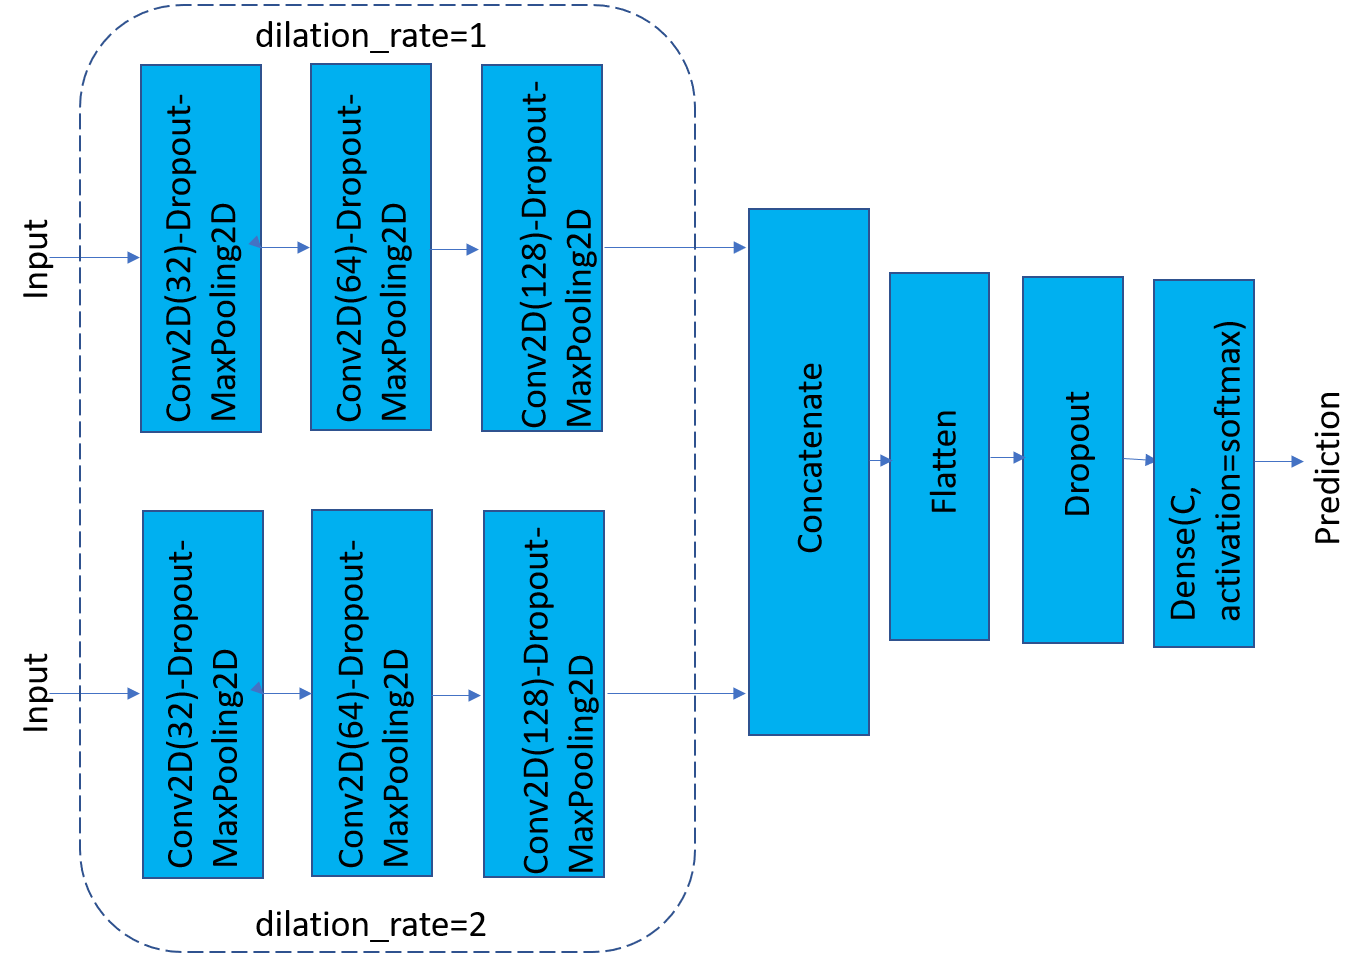

>In addition, for this project, you should examine the overfitting problem by plotting model accuracies on training and validation data, which are recorded in the returning object (`History`) of the Keras `Sequential.fit()` if you are using Keras.

In [ ]:
## TODO: Train CNN network for CIFAR-10
def create_cnn(input_shape, num_classes):

  X_input = Input(input_shape)
  
  layer1 = Conv2D(32, 3, padding = 'same', activation = 'relu', dilation_rate = 1)(X_input)
  layer1 = Dropout(rate=0.4)(layer1)
  layer1 = MaxPooling2D()(layer1)
  layer1 = Conv2D(64, 3, padding = 'same', activation = 'relu', dilation_rate = 1)(layer1)
  layer1 = Dropout(rate=0.4)(layer1)
  layer1 = MaxPooling2D()(layer1)
  layer1 = Conv2D(128, 3, padding = 'same', activation = 'relu', dilation_rate = 1)(layer1)
  layer1 = Dropout(rate=0.5)(layer1)
  layer1 = MaxPooling2D()(layer1)

  layer2 = Conv2D(32, 3, padding = 'same', activation = 'relu', dilation_rate = 2)(X_input)
  layer2 = Dropout(rate=0.4)(layer2)
  layer2 = MaxPooling2D()(layer2)
  layer2 = Conv2D(64, 3, padding = 'same', activation = 'relu', dilation_rate = 2)(layer2)
  layer2 = Dropout(rate=0.4)(layer2)
  layer2 = MaxPooling2D()(layer2)
  layer2 = Conv2D(128, 3, padding = 'same', activation = 'relu', dilation_rate = 2)(layer2)
  layer2 = Dropout(rate=0.5)(layer2)
  layer2 = MaxPooling2D()(layer2)

  layers = concatenate([layer1, layer2], axis = -1)

  X = Flatten()(layers)
  X = Dense(num_classes,activation='softmax')(X)

  model = Model(inputs=X_input, outputs = X)
  model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

model = create_cnn(X_train[0].shape, y_train.shape[1])

checkpoint = ModelCheckpoint('model.h5', save_best_only=True,monitor='val_accuracy',verbose=1)
earlystopper = EarlyStopping(patience = 40,monitor='val_accuracy',verbose=1)
reduceLR = ReduceLROnPlateau(monitor="val_accuracy", factor=0.5, patience=10, min_lr=0.0001, verbose = 1)

history = model.fit(x=X_train, y=y_train, batch_size = 128, epochs = 200, validation_data = (X_test, y_test), callbacks = [checkpoint, earlystopper,reduceLR],verbose='auto')

model = load_model('model.h5')

print()
print('Test acc (%) - ',model.evaluate(X_test,y_test,verbose=0)[1]*100)

Epoch 1/200
390/391 [============================>.] - ETA: 0s - loss: 1.5094 - accuracy: 0.4603
Epoch 1: val_accuracy improved from -inf to 0.55890, saving model to model.h5
391/391 [==============================] - 9s 21ms/step - loss: 1.5088 - accuracy: 0.4604 - val_loss: 1.6373 - val_accuracy: 0.5589 - lr: 0.0010
Epoch 2/200
388/391 [============================>.] - ETA: 0s - loss: 1.1118 - accuracy: 0.6095
Epoch 2: val_accuracy improved from 0.55890 to 0.64260, saving model to model.h5
391/391 [==============================] - 8s 20ms/step - loss: 1.1117 - accuracy: 0.6095 - val_loss: 1.3810 - val_accuracy: 0.6426 - lr: 0.0010
Epoch 3/200
388/391 [============================>.] - ETA: 0s - loss: 0.9587 - accuracy: 0.6638
Epoch 3: val_accuracy improved from 0.64260 to 0.65570, saving model to model.h5
391/391 [==============================] - 8s 20ms/step - loss: 0.9587 - accuracy: 0.6636 - val_loss: 1.3058 - val_accuracy: 0.6557 - lr: 0.0010
Epoch 4/200
388/391 [=============

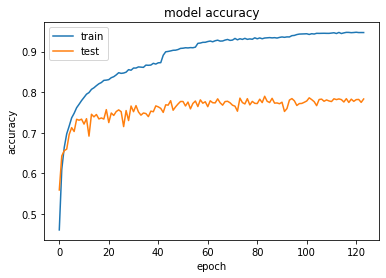

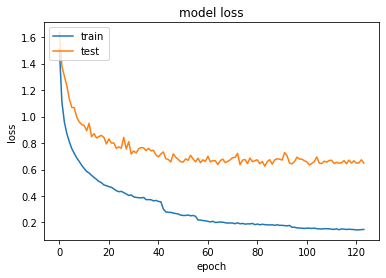

In [ ]:
## TODO: Plot model accuracies on training and validation data for CIFAR-10
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The gap between the train and validation accuracies is quite clear, which indicates substantial overfitting. To alleviate this we can increase the dropout value, and maybe decrease the number of filters in each layer.

---



In [ ]:
## TODO: Train CNN network for CIFAR-100
from keras.datasets import cifar100

(X_train, y_train), (X_test, y_test) = cifar100.load_data()

X_train = (X_train / 255).astype(np.float32)
X_test = (X_test / 255).astype(np.float32)
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

model = create_cnn(X_train[0].shape, y_train.shape[1])

checkpoint = ModelCheckpoint('model.h5', save_best_only=True,monitor='val_accuracy',verbose=1)
earlystopper = EarlyStopping(patience = 30,monitor='val_accuracy',verbose=1)
reduceLR = ReduceLROnPlateau(monitor="val_accuracy", factor=0.5, patience=10, min_lr=0.0001, verbose = 1)

history = model.fit(x=X_train, y=y_train, batch_size = 128, epochs = 200, validation_data = (X_test, y_test), callbacks = [checkpoint, earlystopper,reduceLR],verbose='auto')

model = load_model('model.h5')

print()
print('Test acc (%) - ',model.evaluate(X_test,y_test,verbose=0)[1]*100)

Epoch 1/200
388/391 [============================>.] - ETA: 0s - loss: 3.6425 - accuracy: 0.1587
Epoch 1: val_accuracy improved from -inf to 0.24710, saving model to model.h5
391/391 [==============================] - 9s 21ms/step - loss: 3.6387 - accuracy: 0.1594 - val_loss: 3.8396 - val_accuracy: 0.2471 - lr: 0.0010
Epoch 2/200
388/391 [============================>.] - ETA: 0s - loss: 2.8844 - accuracy: 0.2929
Epoch 2: val_accuracy improved from 0.24710 to 0.28910, saving model to model.h5
391/391 [==============================] - 8s 20ms/step - loss: 2.8842 - accuracy: 0.2932 - val_loss: 3.5565 - val_accuracy: 0.2891 - lr: 0.0010
Epoch 3/200
388/391 [============================>.] - ETA: 0s - loss: 2.5516 - accuracy: 0.3600
Epoch 3: val_accuracy improved from 0.28910 to 0.34880, saving model to model.h5
391/391 [==============================] - 8s 20ms/step - loss: 2.5504 - accuracy: 0.3602 - val_loss: 3.2665 - val_accuracy: 0.3488 - lr: 0.0010
Epoch 4/200
388/391 [=============

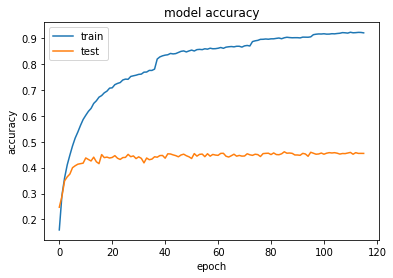

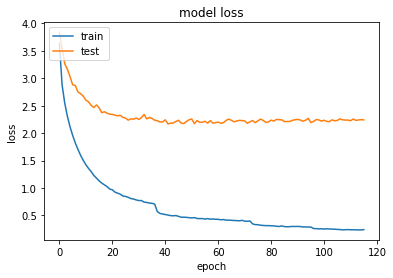

In [ ]:
## TODO: Plot model accuracies on training and validation data for CIFAR-100
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

As can be seen in the graphs, there is a great gap between the two losses and accuracies of train and val sets. This suggests there is a lot of overfitting, which could be alleviated with data augmentation, regularization, as well as reducing model complexity.

#Section 3. Generative Adversarial Networks (GANs) [ 40 points ]

In this assignment, we will make use of Generative Adversarial Networks (GANs) in order to generate images from an annotated dataset. We will be implementing the architecture from scratch using only foundational PyTorch building blocks.

A GAN consists of 2 main components: a Generator and a Discriminator, which are simultaneously trained. The generator is in charge of generating images from noise vectors, and the discriminator then predicts whether the generated images are "real" or "fake." The generator wants the discriminator to think all the former's generated images are real, while the discriminator wants to distinguish the generator's fake images from actually real images. The GAN architecture is illustrated in the figure below. Source: [Thalles Silva](https://www.freecodecamp.org/news/an-intuitive-introduction-to-generative-adversarial-networks-gans-7a2264a81394).

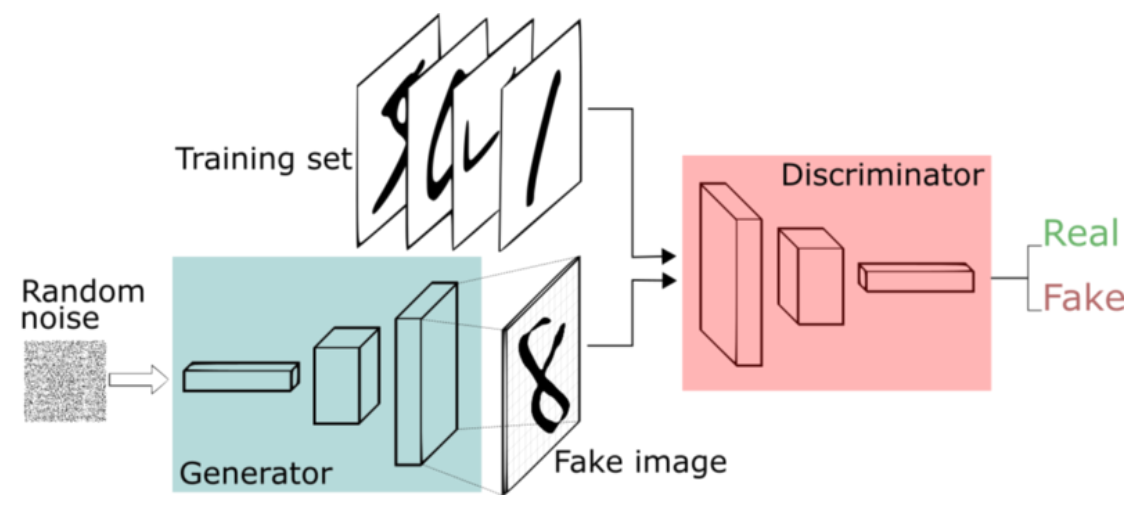

We first import necessary packages:

In [31]:
import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
from typing import Tuple
import matplotlib.pyplot as plt
from torch.autograd import Variable

%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 8.0)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gray"

## 3.1. Data Preparation

We will be generating images from the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), consisting of small, grayscale images of pieces of clothing. The dataset contains $60,000$ training and $10,000$ test examples, each of which is an image of shape $1 \times 28 \times 28$, with the dimensions respectively denoting the image channel count ($1$ because it is grayscale), height, and width. The are 10 classes in total:

0.	T-shirt/top
1.	Trouser
2.	Pullover
3.	Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9.	Ankle boot

Here are some example images, as taken from the Fashion-MNIST repository, which can be accessed through the link above. Follow the link for more details.

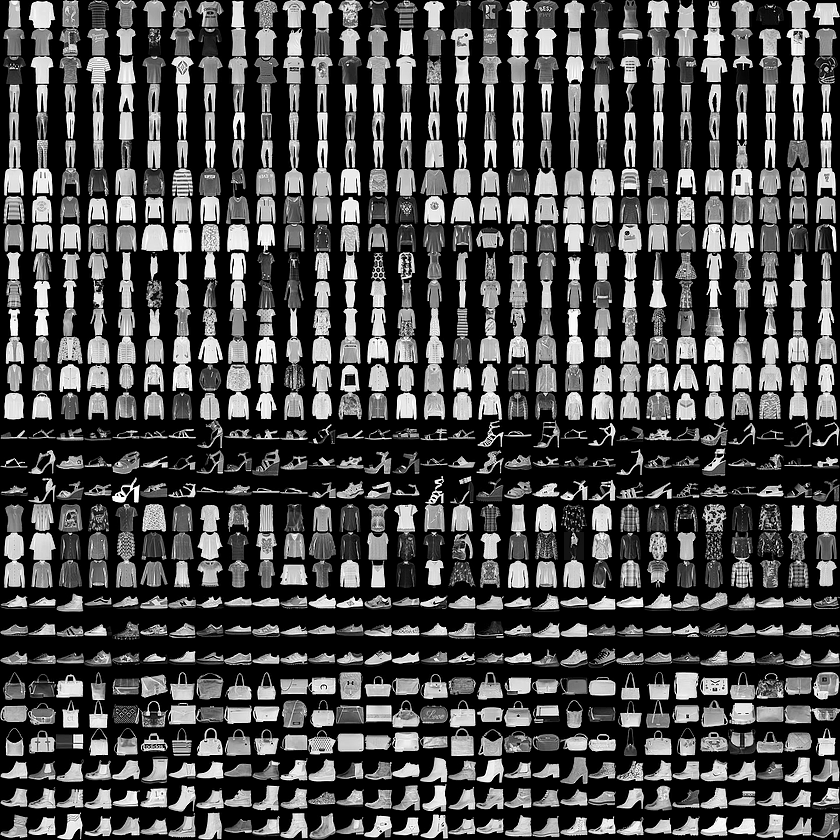

We can import Fashion-MNIST from `torchvision` as follows:

In [32]:
from torchvision.datasets import FashionMNIST

fmnist_dataset = FashionMNIST(".", download=True, transform=transforms.ToTensor())
fmnist_shape = fmnist_dataset[0][0].shape

We can use `fmnist_shape` hereafter as our image dimensions. To visualize our image data, we use the following function:

In [33]:
def show_images(
    imgs: torch.Tensor,
    size: Tuple[int, int, int],
    ncols: int=8,
    max_imgs: int=32
):
    if imgs.is_cuda:
        imgs = imgs.detach().cpu()
    num_imgs = min(imgs.shape[0], max_imgs)
    imgs = imgs.view(-1, *size)
    img_grid = make_grid(imgs[:num_imgs], ncols)
    plt.imshow(img_grid.permute(1, 2, 0).squeeze())
    plt.show()

Display the first 32 images in the dataset:

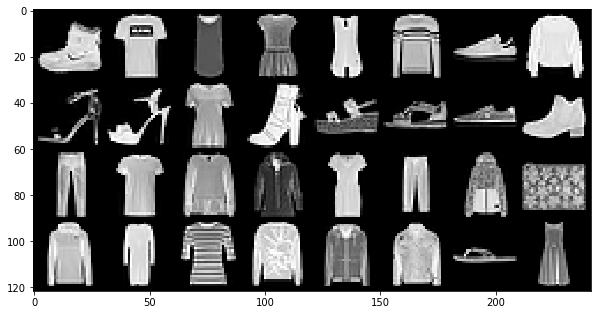

In [34]:
num_imgs, ncols = 32, 8
to_display = torch.cat([fmnist_dataset[i][0] for i in range(num_imgs)])
show_images(to_display, fmnist_shape, ncols)

## 3.2. Generator [ 10 points ]

We first build the generator for our GAN, which is in charge of the image generation part of our model. The generator consists of a number of generator blocks of different dimensions.

For convenience, we write code to obtain a generator block of input size `input_dim` and ouput size `output_dim`. A generator block should contain:

1. A [linear layer](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) to transform our data from the input dimension to the output dimension
2. A [batch normalization layer](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html) to normalize our data for more efficient training
3. A [rectified linear unit layer (ReLU)](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html) as activation

We can chain these layers using PyTorch's [Sequential container](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html).

In [35]:
def get_generator_block(input_dim, output_dim):
    # TODO: Start your code here
    G = nn.Sequential(
      nn.Linear(input_dim, output_dim),
      nn.BatchNorm1d(output_dim),
      nn.ReLU()
    )
    return G
    # End your code here

We can now write code for the `Generator` module of our GAN. The generator takes in 3 values:

1. The noise vector dimension `noise_dim`
2. The *flattened* image dimension `img_dim`
3. The generator's initial hidden dimension `hidden_dim`

Our generator should have 5 layers:

1. A generator block that takes in the noise vector and outputs a vector of dimension `hidden_dim`
2. A generator block with an output size twice the previous's
3. A generator block with an output size twice the previous's
4. A generator block with an output size twice the previous's
5. A final block consisting of: a linear layer that outputs our generated image with the same `img_dim`, and a [sigmoid activation layer](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html) that scales our output to $(0,1)$

The `forward` pass should just pass the noise vector through your generator and return the value.

In [36]:
class Generator(nn.Module):
    def __init__(self, noise_dim, img_dim, hidden_dim):
        super(Generator, self).__init__()
        # TODO: Start your code here
        self.z_dim = noise_dim
        self.generator = nn.Sequential(
            get_generator_block(self.z_dim, hidden_dim),
            get_generator_block(hidden_dim, 2*hidden_dim),
            get_generator_block(2*hidden_dim, 2*2*hidden_dim),
            get_generator_block(2*2*hidden_dim, 2*2*2*hidden_dim),
            nn.Linear(2*2*2*hidden_dim, img_dim),
            nn.Sigmoid()
        )
        
        # End your code here

    def forward(self, noise):
        # TODO: Start your code here
        out = self.generator(noise)
        return out
        # End your code here

## 3.3. Noise [ 5 points ]

In order to use our generator, we will need to create noise vectors to be passed through our model. The noise vectors basically act as a random seed and ensure that all generated data from one class does not look identical. You will be generating it from a normal distribution using PyTorch.

Generate `num_samples` noise vectors of dimension `noise_dim`, making sure it is on the correct `device`:

In [37]:
def get_noise(num_samples, noise_dim, device="cpu"):
    # TODO: Start your code here
    noise = Variable(torch.randn(num_samples,noise_dim)).to(device=device)
    return noise
    # End your code here

## 3.4. Discriminator [ 10 points ]

The next important part of a GAN is the discriminator, which basically acts as a classifier that evaluates whether the generator's output is "fake" or "real." Similarly to the generator, the discriminator is made up of a number of different discriminator blocks, each of which contains:

1. A linear layer to transform out data from size `input_dim` to size `output_dim`
2. A [leaky ReLU](https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html) with a negative slope of $0.2$

In [38]:
def get_discriminator_block(input_dim, output_dim):
    # TODO: Start your code here
    D = nn.Sequential(
      nn.Linear(input_dim, output_dim),
      nn.LeakyReLU(0.2, inplace=True)
    )
    return D
    # End your code here

Now we construct our `Discriminator` class, which takes in the image size `img_dim` and the discriminator's hidden size `hidden_dim`. The module should consist of 4 layers:

1. A discriminator block that takes in our image and outputs a vector of dimension `4 * hidden_dim`
2. A discriminator block with an output size half the previous's (`2 * hidden_dim`)
3. A discriminator block with an output size half the previous's (`hidden_dim`)
3. A final linear layer that transform the output into a single scalar

Note that we will not need a sigmoid layer here, as it will be included later in our loss function for efficiency. More on this later.

The `forward` pass should also simply forward our image through our sequence of layers.

In [39]:
class Discriminator(nn.Module):
    def __init__(self, img_dim=784, hidden_dim=128):
        super(Discriminator, self).__init__()
        # TODO: Start your code here
        self.discriminator = nn.Sequential(
            get_discriminator_block(img_dim,4*hidden_dim),
            get_discriminator_block(4*hidden_dim,2*hidden_dim),
            get_discriminator_block(2*hidden_dim,hidden_dim),
            nn.Linear(hidden_dim,1)
        )
        # End your code here

    def forward(self, image):
        # TODO: Start your code here
        out = self.discriminator(image)
        return out
        # End your code here

## 3.5. GAN Losses [ 10 points ]

In order to train our GAN, we will need to write functions to compute losses for our generator and discriminator. First, we define a criterion function that obtains the loss given a set of predictions and a corresponding set of ground truth targets. Since the discriminator is looking at a binary problem ("real" vs. "fake"), we will use binary cross entropy (BCE) loss:

In [40]:
criterion = nn.BCEWithLogitsLoss()

*Note*: This loss is a variant that includes sigmoid in it already, which is why we did not have to specify a sigmoid layer at the end of our discriminator. Its non-sigmoid counterpart is [`nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html). According to PyTorch,

> [*BCEWithLogitsLoss*] is more numerically stable than using a plain Sigmoid followed by a BCELoss as, by combining the operations into one layer, we take advantage of the log-sum-exp trick for numerical stability.

With this in hand, we can now write the `get_generator_loss()` function to get the loss for our generator. The steps are as follows:

1. Get all noise vectors at once (each corresponding to one image from our dataset) from `num_images` and `noise_dim`, making sure the tensors are on the correct `device`
2. From the noise vectors, generate fake images using our `generator`
3. Predict the fake images with our `discriminator`
4. Calculate the loss between our predictions and a fake "ground truth" using our `criterion`

*Hint for step 4*: The generator wants the discriminator to think that all of the former's generated images are real. Use either [`torch.zeros_like()`](https://pytorch.org/docs/stable/generated/torch.zeros_like.html) or [`torch.ones_like()`](https://pytorch.org/docs/stable/generated/torch.ones_like.html) accordingly.

In [41]:
def get_generator_loss(generator, discriminator, criterion, num_images, noise_dim, device):
    # TODO: Start your code here
    noise = get_noise(num_images,noise_dim,device)
    fake_images = generator(noise)
    y_pred = discriminator(fake_images)
    g_loss = criterion(y_pred, torch.ones_like(y_pred))
    return g_loss
    # End your code here

The `get_discriminator_loss()` function is a bit more involved, but doable as long as you follow the steps closely. They are as follows:

1. Similarly to above, get all noise vectors and generate fake images using `num_images`, `noise_dim`, `device`, and our `generator`
2. Predict the fake images using our `discriminator`
3. Compute the loss between the (fake) predictions and a fake "ground truth" with `criterion`
4. Here, we are also provided with real images in `real_images`. We want to then predict the real images using our `discriminator`
5. Compute the loss between the (real) predictions and a "ground truth" with `criterion`
6. Obtain the final loss as the average between the losses calculated in steps 3 and 5

*Hint for steps 3 and 5*: Here, unlike in the generator, the discriminator wants to distinguish the fake generated images from the actual ground truth data. Again, use either [`torch.zeros_like()`](https://pytorch.org/docs/stable/generated/torch.zeros_like.html) or [`torch.ones_like()`](https://pytorch.org/docs/stable/generated/torch.ones_like.html) accordingly.

**_Important note for step 2_**: Since we only want the discriminator to update its gradients when working with the actual ground truth data in `real_images`, remember to call `.detach()` on the generator's output when predicting the fake images.

In [42]:
def get_discriminator_loss(generator, discriminator, criterion, real_images, num_images, noise_dim, device):
    # TODO: Start your code here
    noise = get_noise(num_images,noise_dim,device=device)
    fake_images = generator(noise)
    y_pred_fake = discriminator(fake_images)
    d_loss_fake = criterion(y_pred_fake, torch.zeros_like(y_pred_fake))
    y_pred_real = discriminator(real_images)
    d_loss_real = criterion(y_pred_real, torch.ones_like(y_pred_real))
    return (d_loss_fake+d_loss_real)/2
    # End your code here

## 3.6. Training [ 5 points ]

We have all the required components; it is now time to train our GAN. For each epoch, we want to update the generator and discriminator using their losses. We first define our parameters in the following cell. Feel free to play around with them and observe how it improves or degrades your GAN's performance.

In [43]:
n_epochs = 200 # Number of epochs
noise_dim = 64 # Dimension for noise vectors
display_step = 500 # How often to visualize our trianing progress
batch_size = 128 # Batch size
lr = 0.00001 # Learning rate
device = "cuda" # Training on GPU
hidden_size = 128 # Generator and discriminator hidden size

We will be using [`Adam`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) as our optimizer. We will need separate optimizers for the generator and discriminator. Here, we define our models and their corresponding optimizers:

In [44]:
img_dim = fmnist_dataset[0][0].flatten().shape[0]
generator = Generator(noise_dim, img_dim, hidden_size).to(device)
discriminator = Discriminator(img_dim, hidden_size).to(device) 

# Define optimizers
# TODO: Start your code here
generator_opt = torch.optim.Adam(generator.parameters(), lr = lr)
discriminator_opt = torch.optim.Adam(discriminator.parameters(), lr = lr)
# End your code here

Before training, we want to obtain our dataloader from the Fashion-MNIST dataset `fmnist_dataset` we have fetched above, with `shuffle` set to `True`:

In [45]:
dataloader = DataLoader(fmnist_dataset, batch_size=batch_size, shuffle=True)

Lastly, let's write and run our training loop! There is already example code for the discriminator training loop; you will only need to write code for the generator training loop. When you are done, sit back and watch as your GAN learns to generate new images of fashionable clothing items from Fashion-MNIST! Again, feel free to play around with the parameters and observe the changes each configuration produces. It is OK if Colab times out before your GAN is done training; the point is just to get you familiar with the process.

*Note*: We set `retain_graph=True` for the discriminator's backward pass so that information is not lost when we carry out the generator's backward pass. You do not need to do this for the code you will be writing.

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Step 500: Generator loss: 1.0321050032377244, discriminator loss: 0.533824350357056


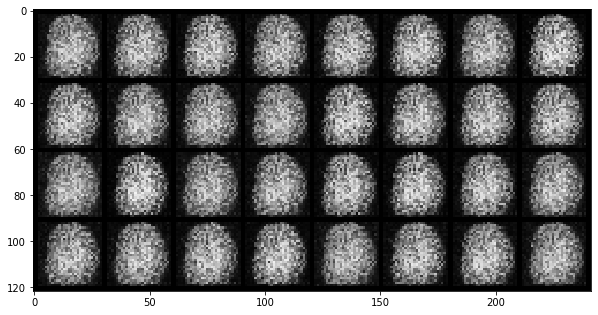

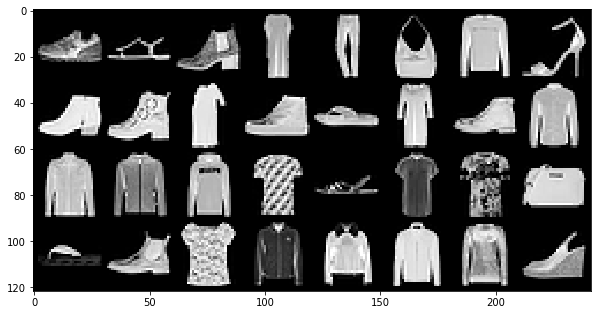

  0%|          | 0/469 [00:00<?, ?it/s]

Step 1000: Generator loss: 1.341748080015183, discriminator loss: 0.36847958713769907


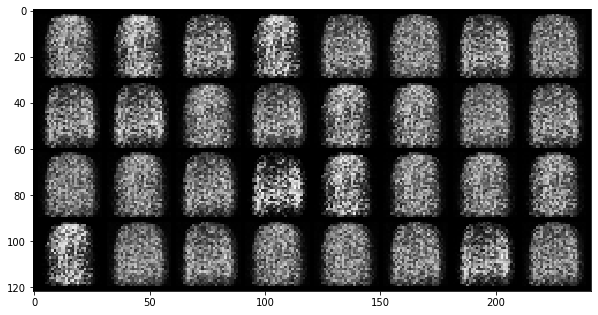

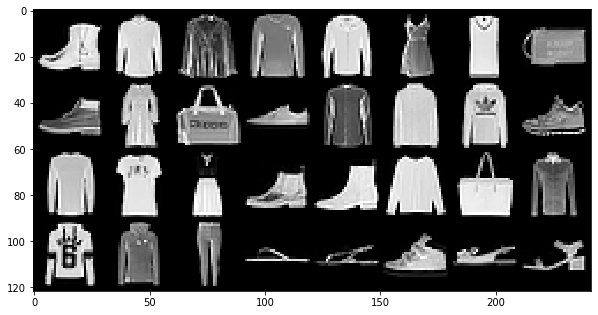

  0%|          | 0/469 [00:00<?, ?it/s]

Step 1500: Generator loss: 1.2145677640438068, discriminator loss: 0.39827232462167744


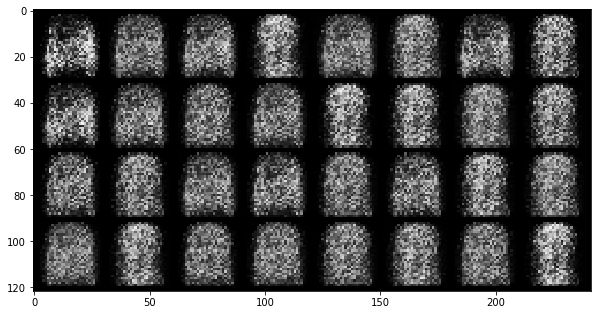

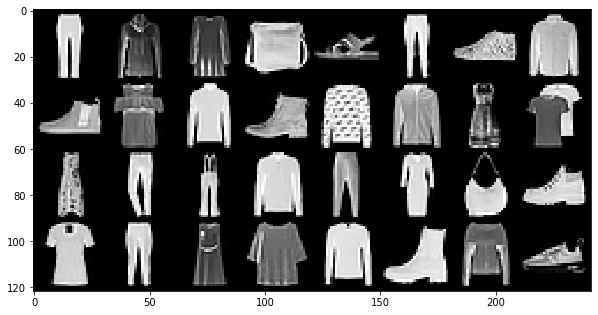

  0%|          | 0/469 [00:00<?, ?it/s]

Step 2000: Generator loss: 1.2852534053325655, discriminator loss: 0.3630906001925471


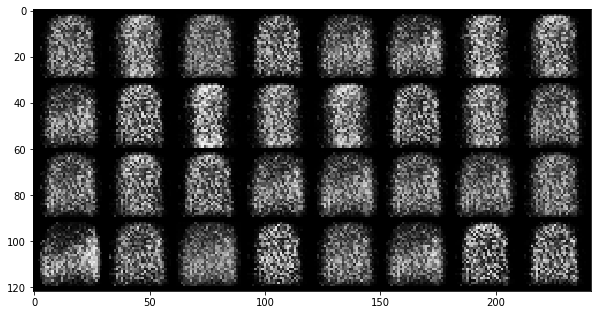

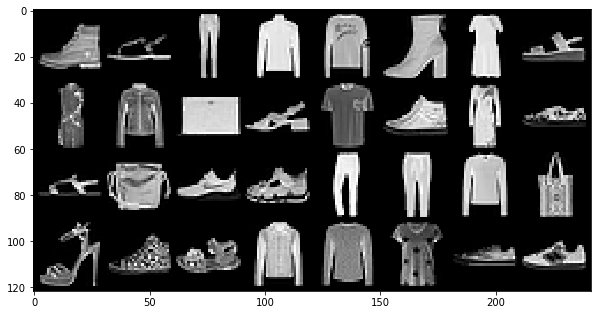

  0%|          | 0/469 [00:00<?, ?it/s]

Step 2500: Generator loss: 1.2933843743801117, discriminator loss: 0.4083589020371435


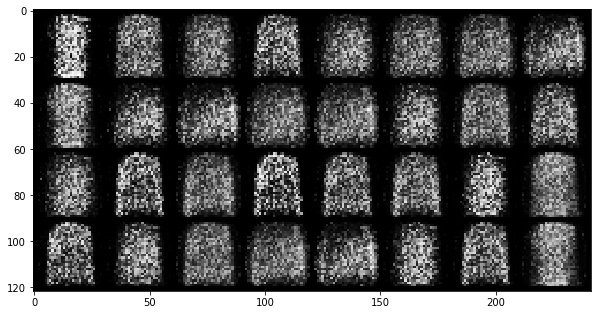

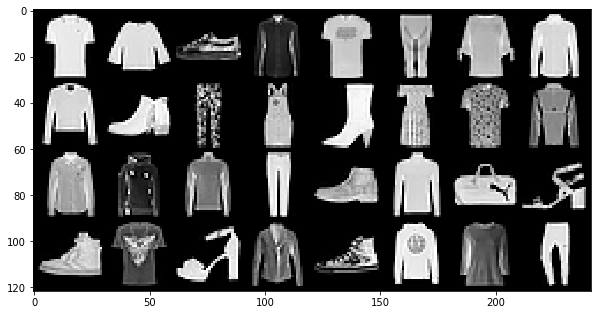

  0%|          | 0/469 [00:00<?, ?it/s]

Step 3000: Generator loss: 1.3266129834651945, discriminator loss: 0.40258284407854045


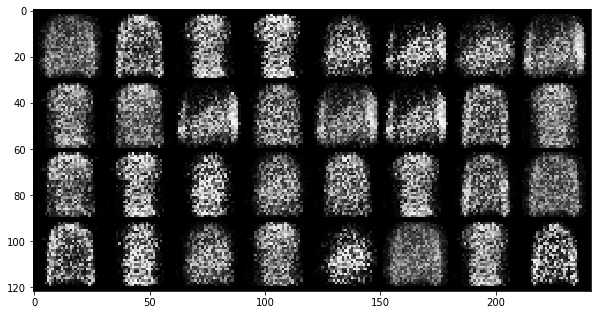

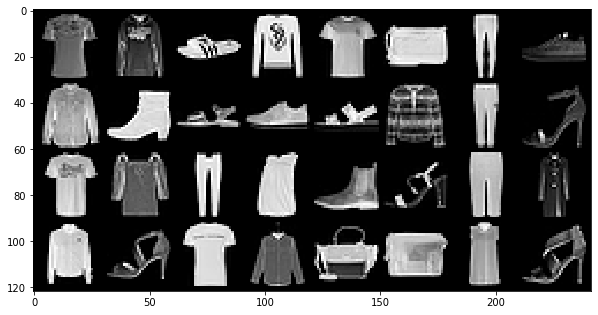

  0%|          | 0/469 [00:00<?, ?it/s]

Step 3500: Generator loss: 1.4454266135692602, discriminator loss: 0.3830494995713228


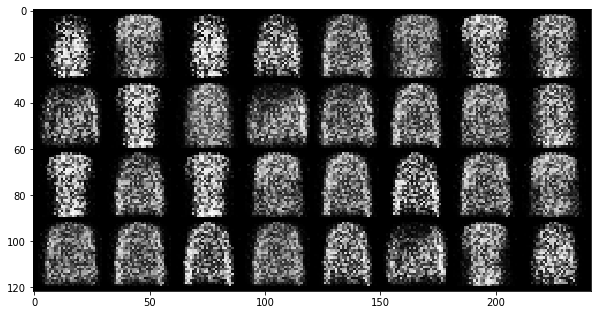

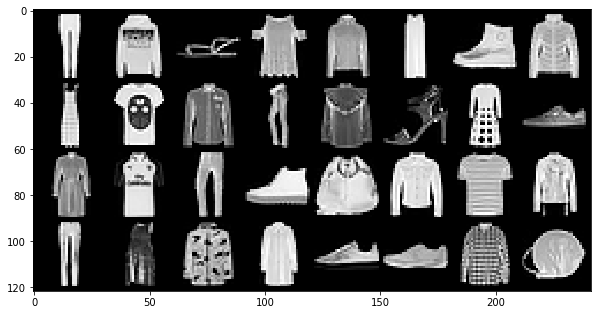

  0%|          | 0/469 [00:00<?, ?it/s]

Step 4000: Generator loss: 1.4956950395107262, discriminator loss: 0.37355811357498137


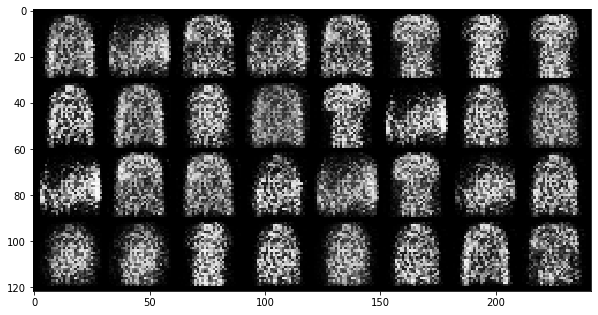

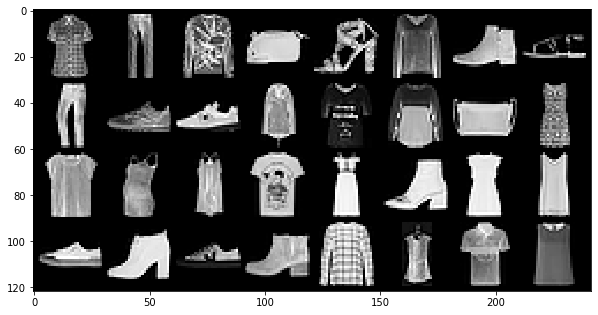

  0%|          | 0/469 [00:00<?, ?it/s]

Step 4500: Generator loss: 1.5792678992748268, discriminator loss: 0.3771402655243873


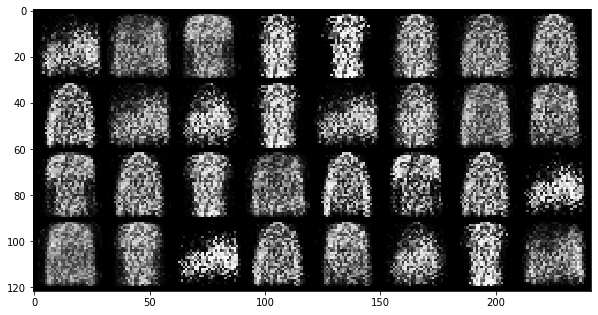

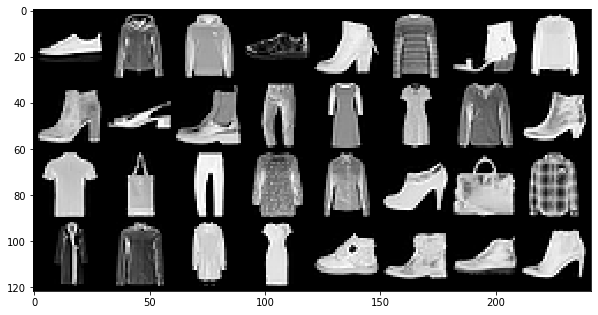

  0%|          | 0/469 [00:00<?, ?it/s]

Step 5000: Generator loss: 1.6288210291862497, discriminator loss: 0.36943019616603884


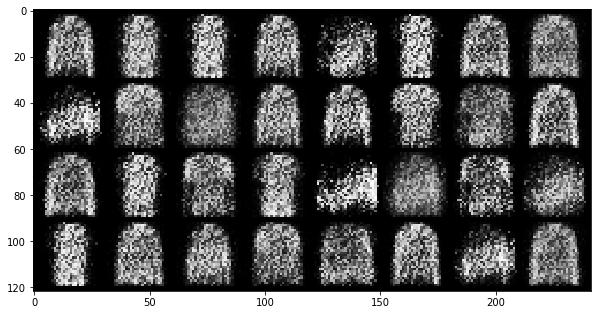

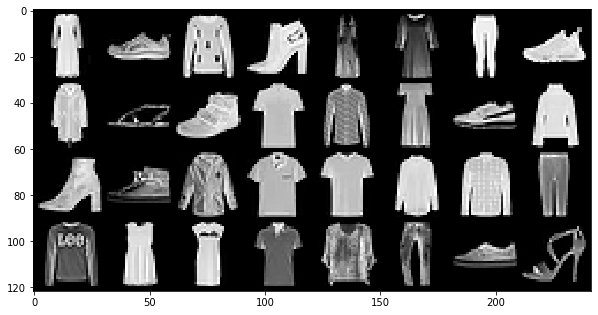

  0%|          | 0/469 [00:00<?, ?it/s]

Step 5500: Generator loss: 1.6602317640781399, discriminator loss: 0.3525619225502012


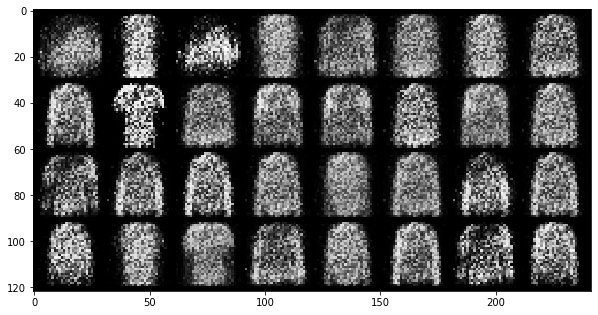

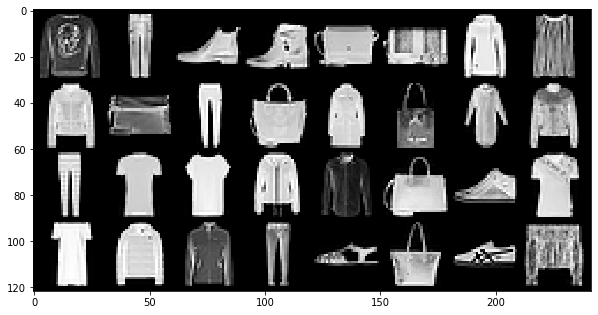

  0%|          | 0/469 [00:00<?, ?it/s]

Step 6000: Generator loss: 1.7034002304077152, discriminator loss: 0.3520828548073765


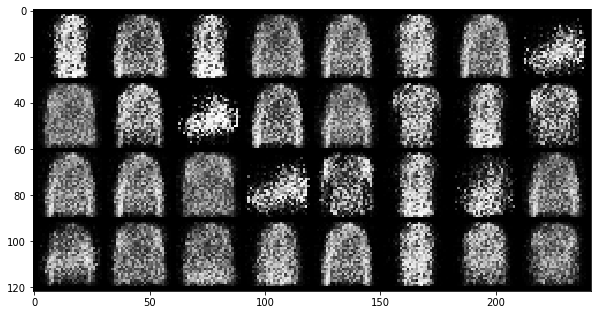

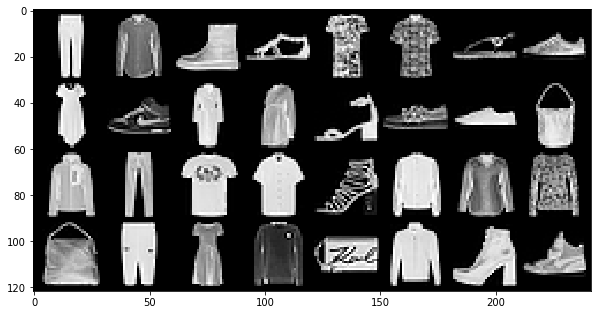

  0%|          | 0/469 [00:00<?, ?it/s]

Step 6500: Generator loss: 1.6793951241970069, discriminator loss: 0.3552090836763382


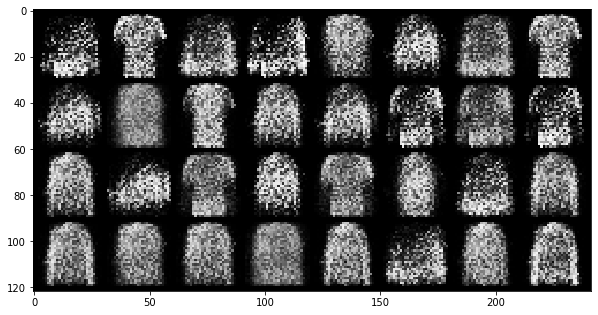

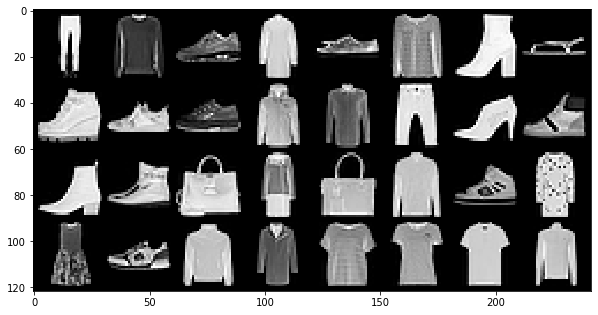

  0%|          | 0/469 [00:00<?, ?it/s]

Step 7000: Generator loss: 1.6676626098155978, discriminator loss: 0.3686124211549761


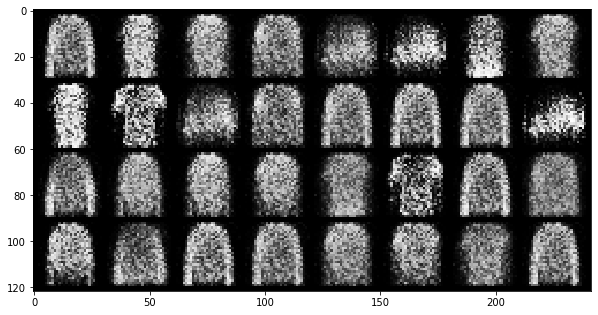

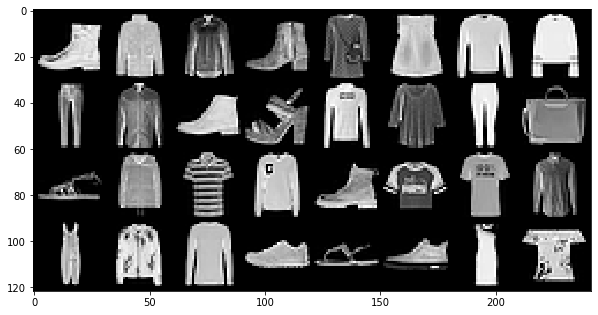

  0%|          | 0/469 [00:00<?, ?it/s]

Step 7500: Generator loss: 1.604377878904344, discriminator loss: 0.36592284792661695


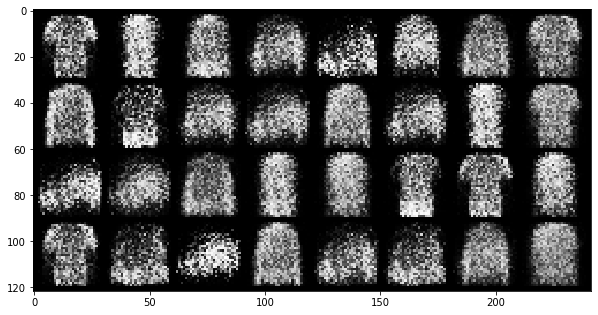

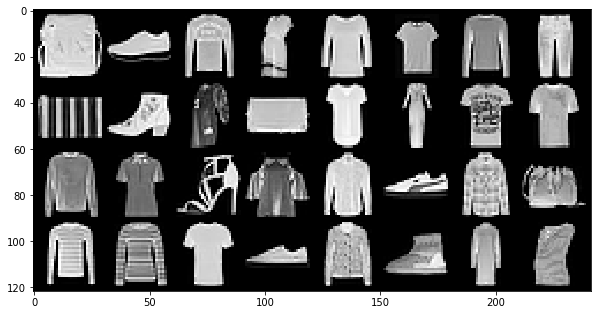

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Step 8000: Generator loss: 1.6731395308971426, discriminator loss: 0.35651740312576324


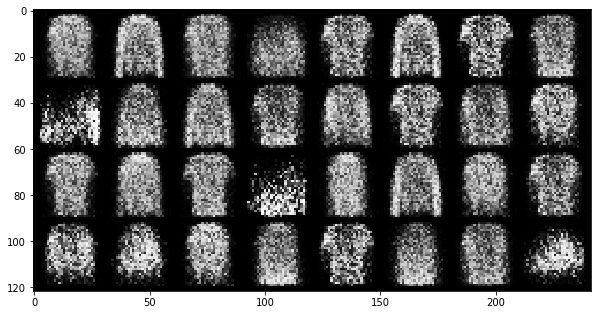

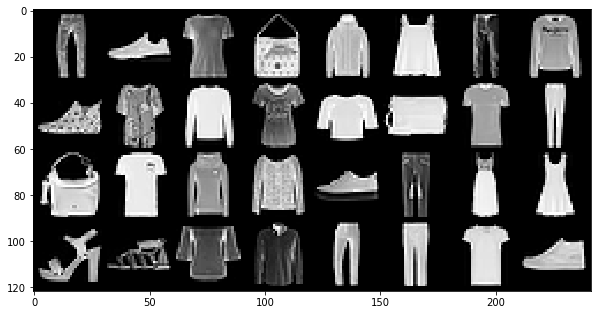

  0%|          | 0/469 [00:00<?, ?it/s]

Step 8500: Generator loss: 1.63205692124367, discriminator loss: 0.3733314997553823


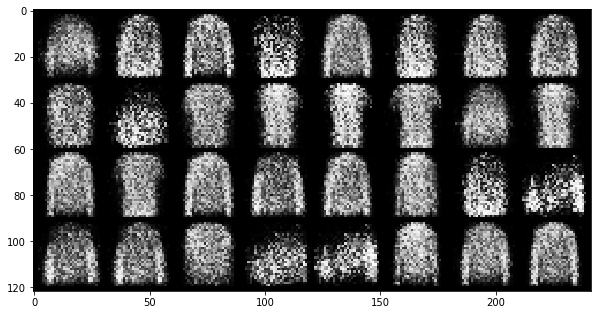

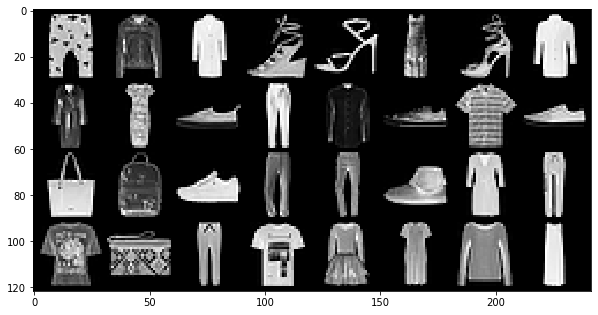

  0%|          | 0/469 [00:00<?, ?it/s]

Step 9000: Generator loss: 1.6382227621078491, discriminator loss: 0.36302497309446313


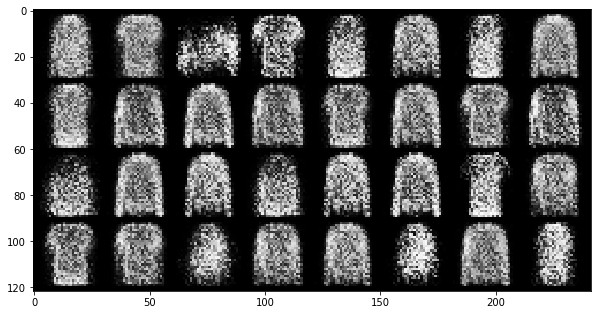

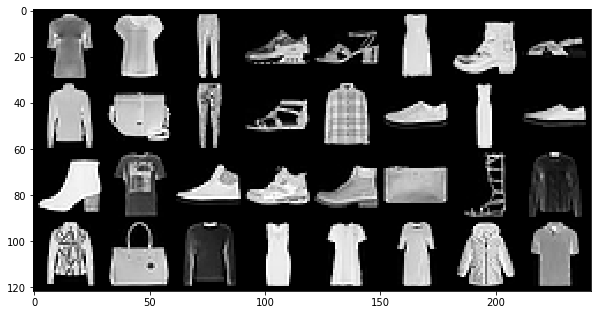

  0%|          | 0/469 [00:00<?, ?it/s]

Step 9500: Generator loss: 1.6726426134109478, discriminator loss: 0.36716022062301673


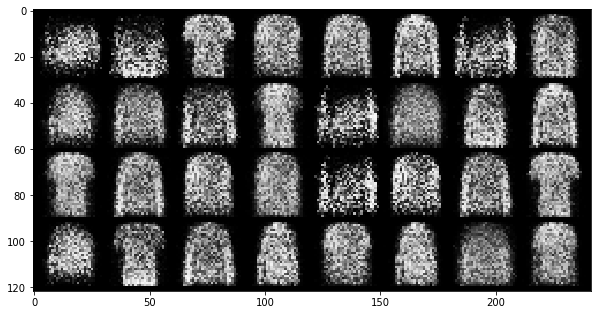

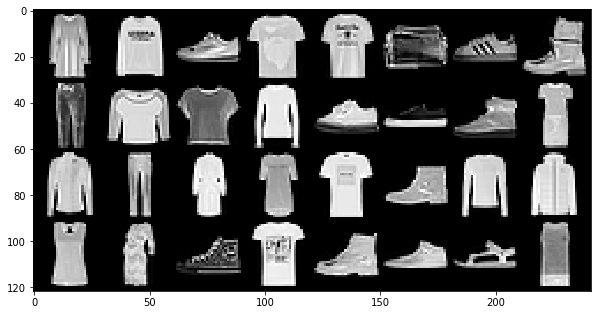

  0%|          | 0/469 [00:00<?, ?it/s]

Step 10000: Generator loss: 1.6569412150382998, discriminator loss: 0.3769732153415684


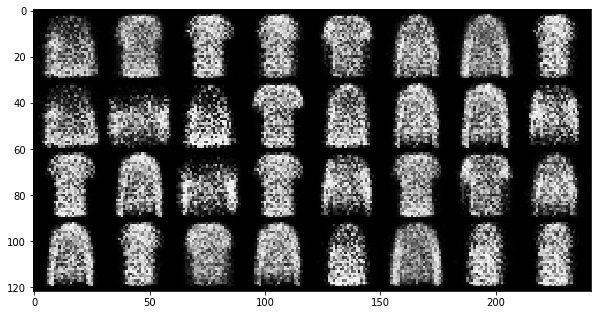

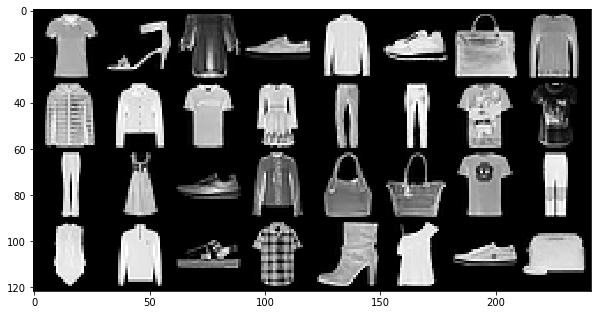

  0%|          | 0/469 [00:00<?, ?it/s]

Step 10500: Generator loss: 1.5854464445114147, discriminator loss: 0.3827050120234489


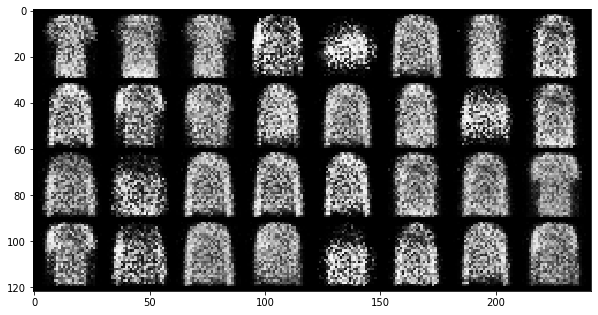

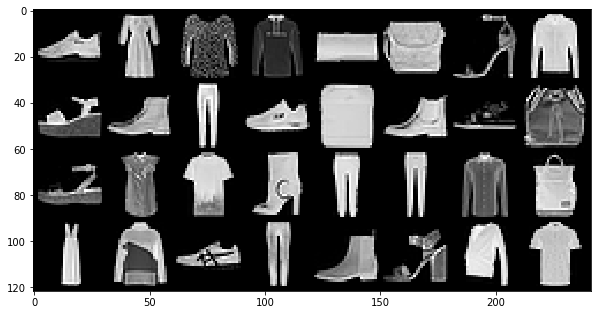

  0%|          | 0/469 [00:00<?, ?it/s]

Step 11000: Generator loss: 1.5977515025138869, discriminator loss: 0.3933453119397168


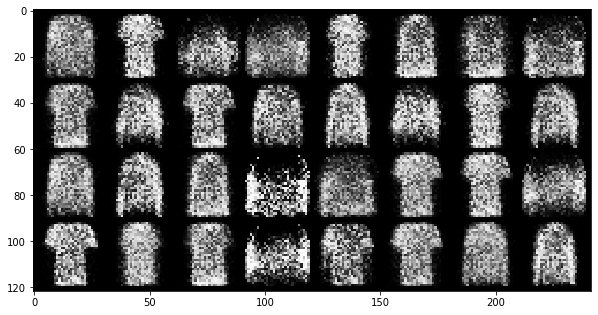

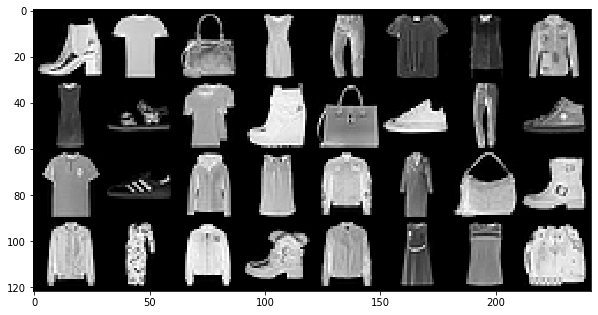

  0%|          | 0/469 [00:00<?, ?it/s]

Step 11500: Generator loss: 1.6014146900177002, discriminator loss: 0.38646452587842894


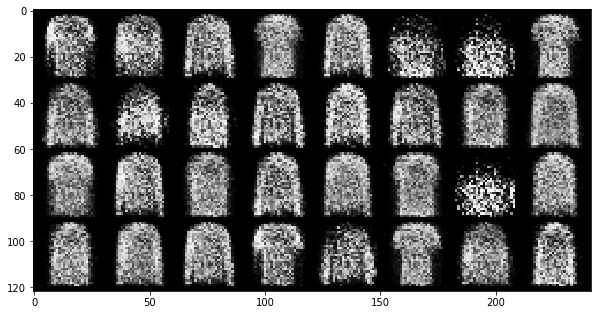

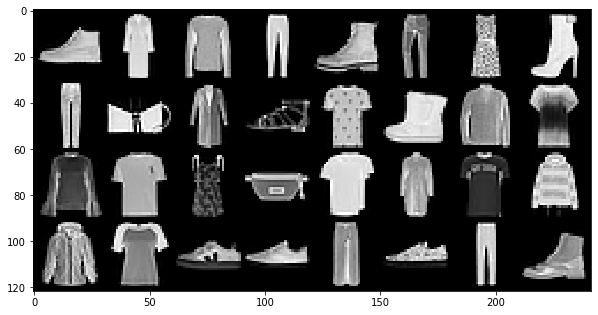

  0%|          | 0/469 [00:00<?, ?it/s]

Step 12000: Generator loss: 1.6417039129734055, discriminator loss: 0.37323124265670776


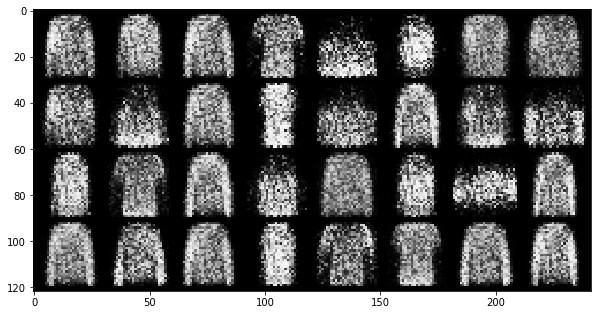

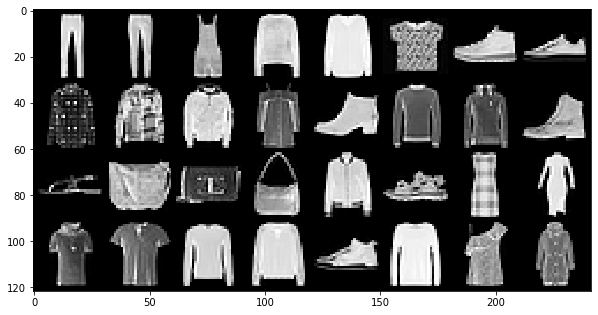

  0%|          | 0/469 [00:00<?, ?it/s]

Step 12500: Generator loss: 1.5546442968845358, discriminator loss: 0.3998612985610961


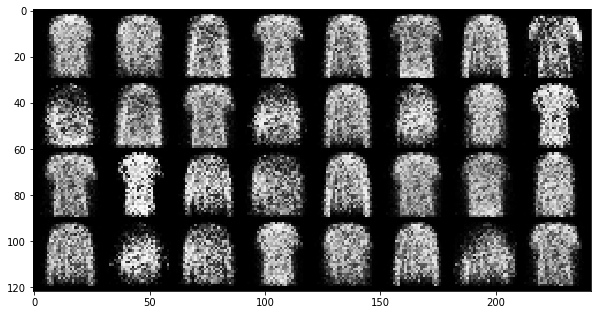

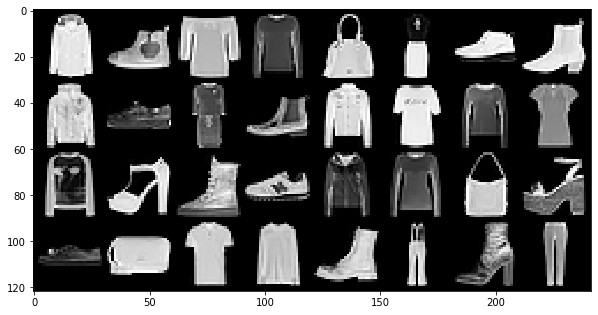

  0%|          | 0/469 [00:00<?, ?it/s]

Step 13000: Generator loss: 1.5553470153808595, discriminator loss: 0.41017620670795474


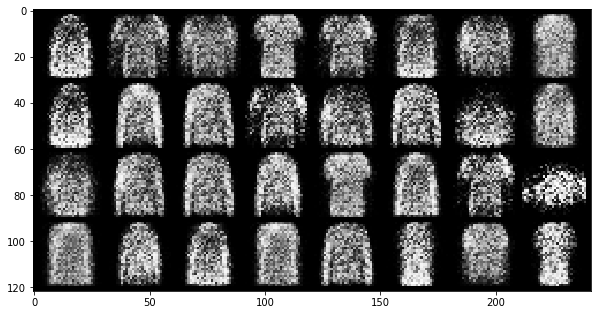

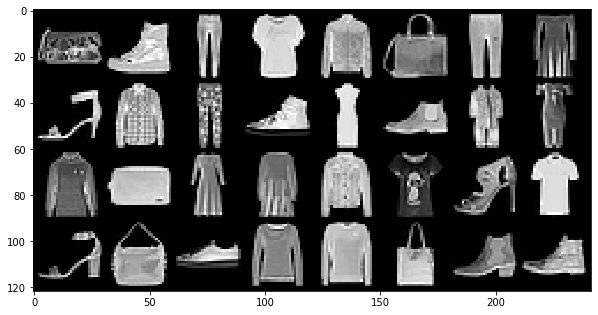

  0%|          | 0/469 [00:00<?, ?it/s]

Step 13500: Generator loss: 1.4950228843688977, discriminator loss: 0.41433376598358185


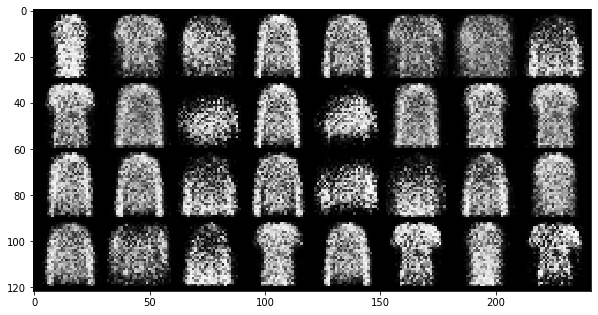

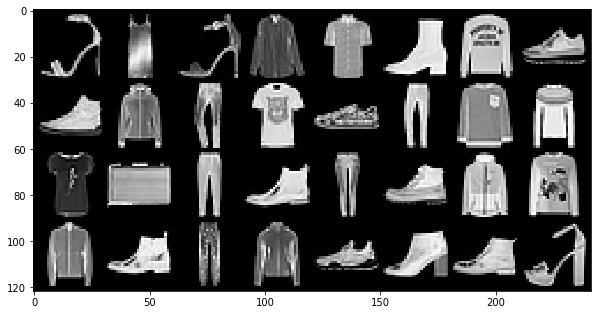

  0%|          | 0/469 [00:00<?, ?it/s]

Step 14000: Generator loss: 1.54925041627884, discriminator loss: 0.4071744734644888


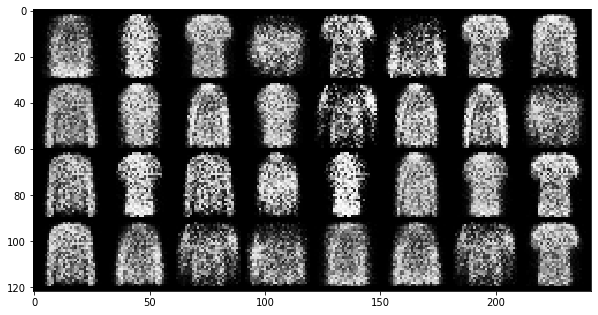

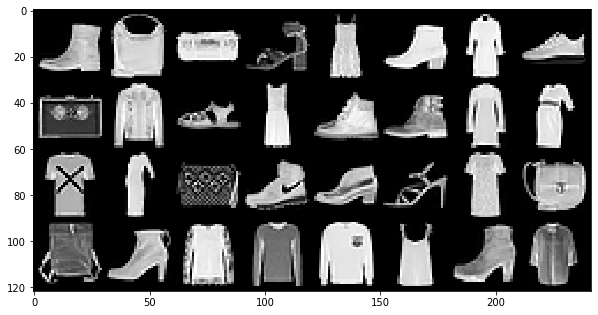

  0%|          | 0/469 [00:00<?, ?it/s]

Step 14500: Generator loss: 1.6095695235729226, discriminator loss: 0.3976468690633772


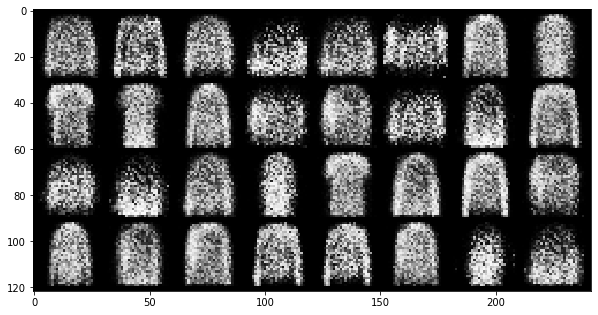

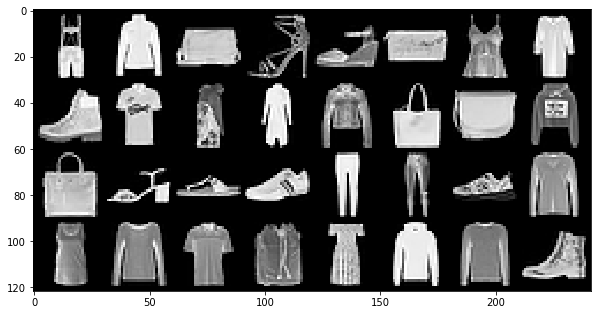

  0%|          | 0/469 [00:00<?, ?it/s]

Step 15000: Generator loss: 1.5198464591503138, discriminator loss: 0.4070244834423063


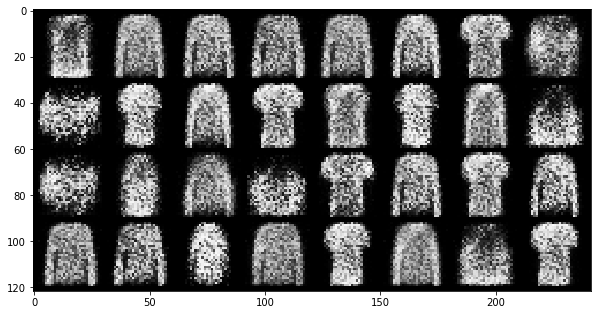

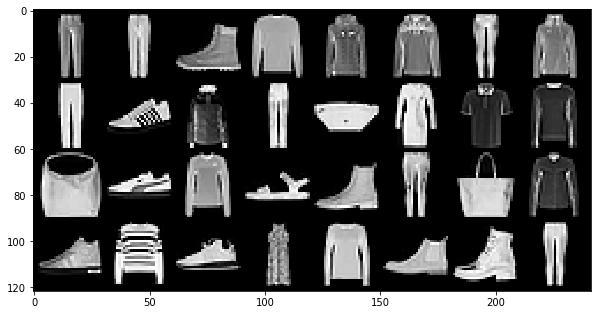

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Step 15500: Generator loss: 1.5643259646892547, discriminator loss: 0.4018899261951451


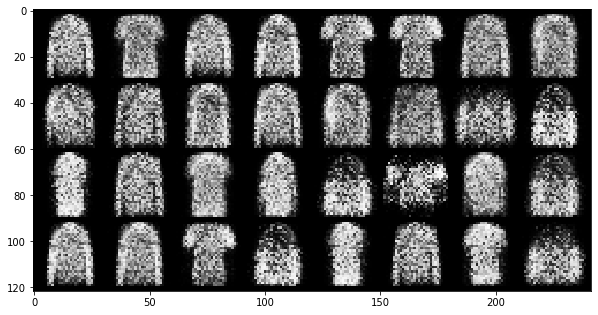

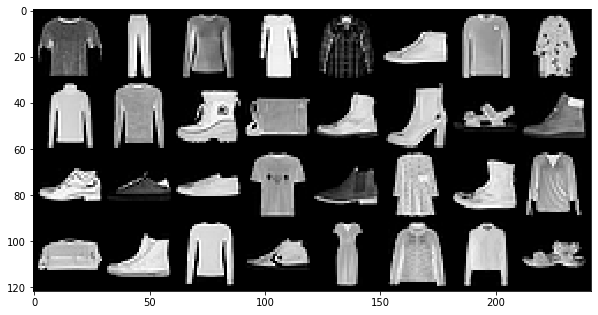

  0%|          | 0/469 [00:00<?, ?it/s]

Step 16000: Generator loss: 1.5404768054485327, discriminator loss: 0.40427270734310156


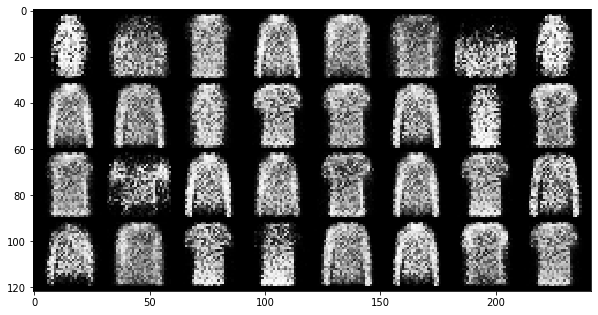

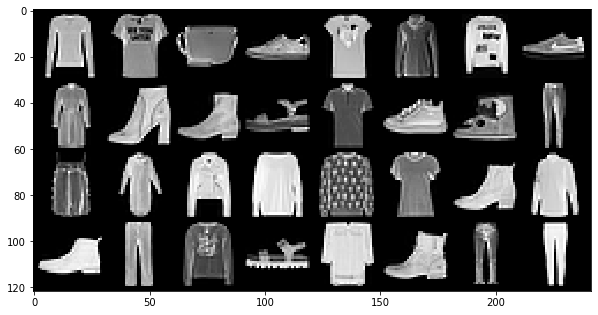

  0%|          | 0/469 [00:00<?, ?it/s]

Step 16500: Generator loss: 1.451993517160415, discriminator loss: 0.4266936419010159


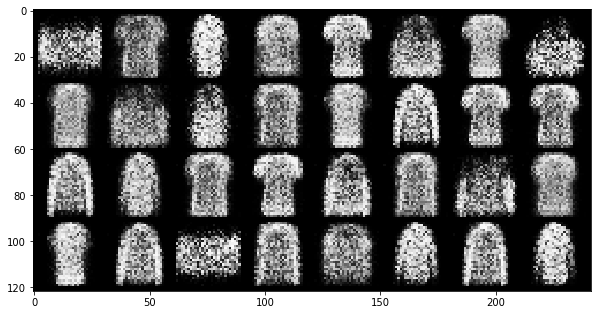

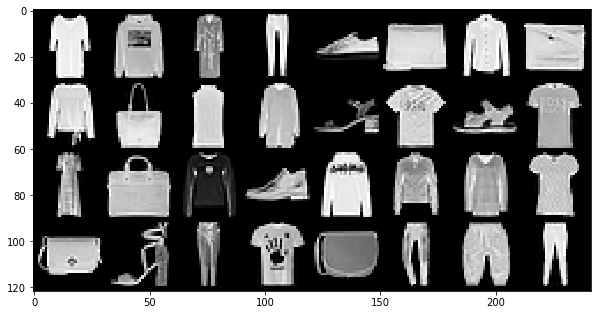

  0%|          | 0/469 [00:00<?, ?it/s]

Step 17000: Generator loss: 1.4831164941787711, discriminator loss: 0.42249665790796254


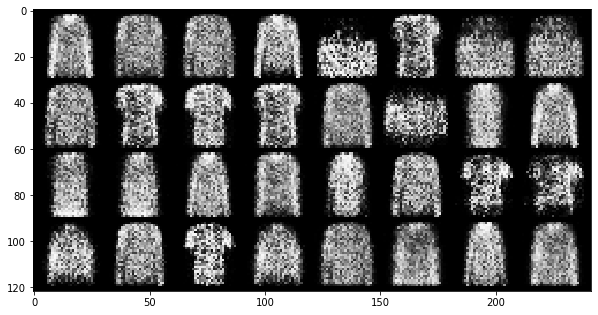

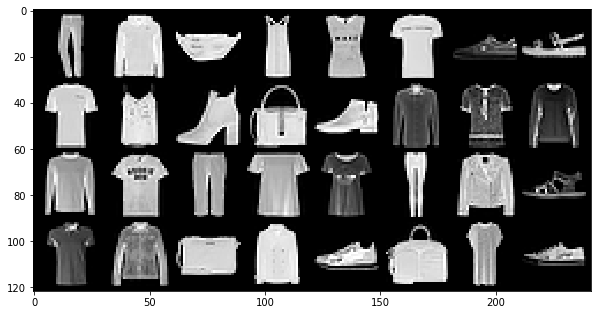

  0%|          | 0/469 [00:00<?, ?it/s]

Step 17500: Generator loss: 1.4422213261127481, discriminator loss: 0.43575051122903863


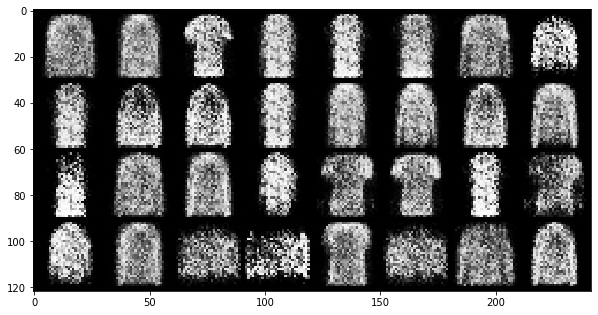

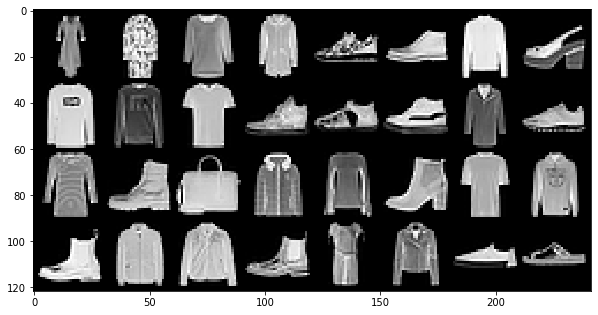

  0%|          | 0/469 [00:00<?, ?it/s]

Step 18000: Generator loss: 1.4116542263031029, discriminator loss: 0.43963725775480256


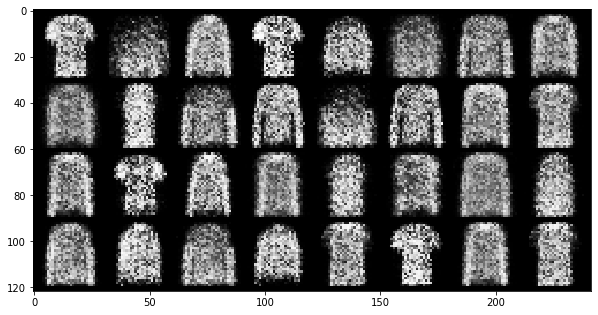

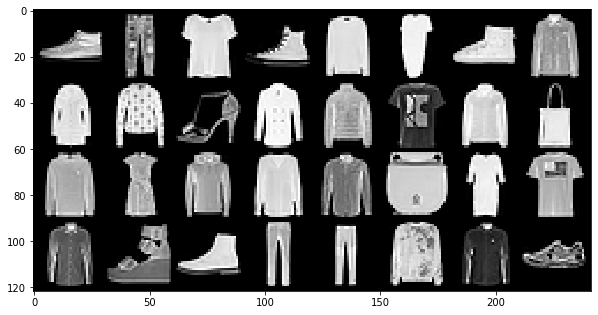

  0%|          | 0/469 [00:00<?, ?it/s]

Step 18500: Generator loss: 1.4051270022392277, discriminator loss: 0.43963121598959


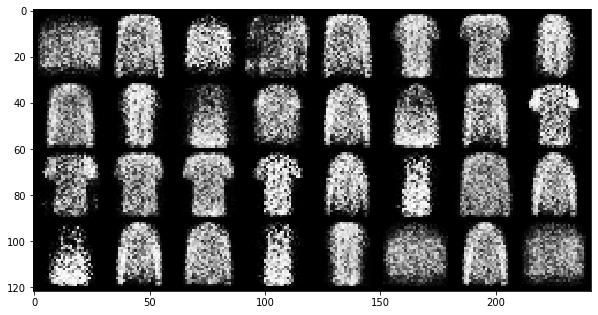

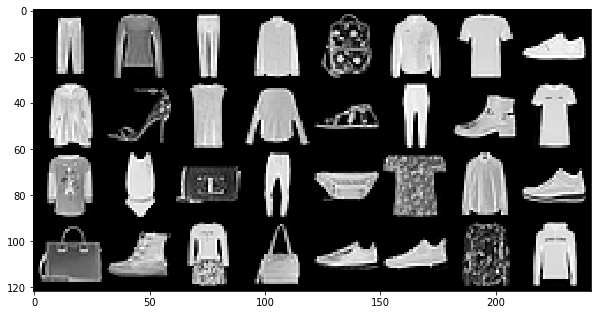

  0%|          | 0/469 [00:00<?, ?it/s]

Step 19000: Generator loss: 1.44416202378273, discriminator loss: 0.44316095101833347


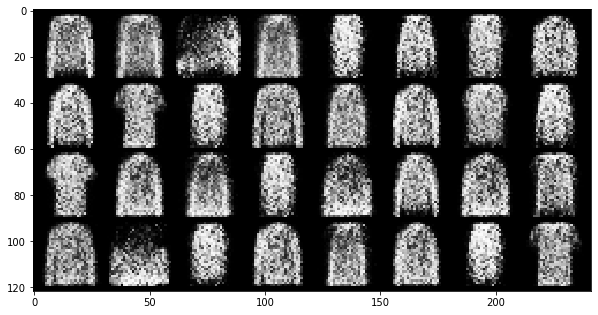

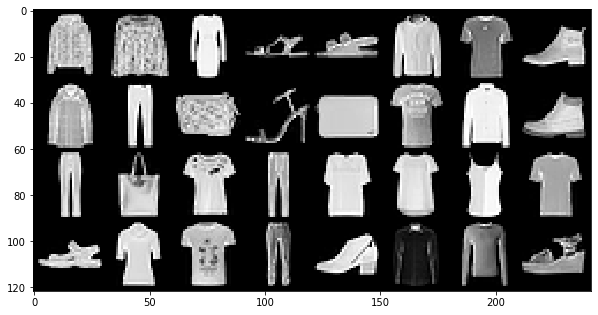

  0%|          | 0/469 [00:00<?, ?it/s]

Step 19500: Generator loss: 1.3426068351268776, discriminator loss: 0.4582123764157297


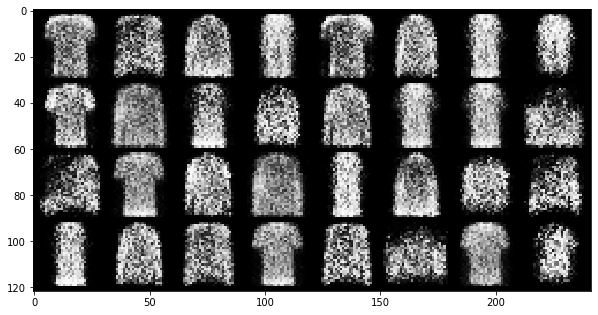

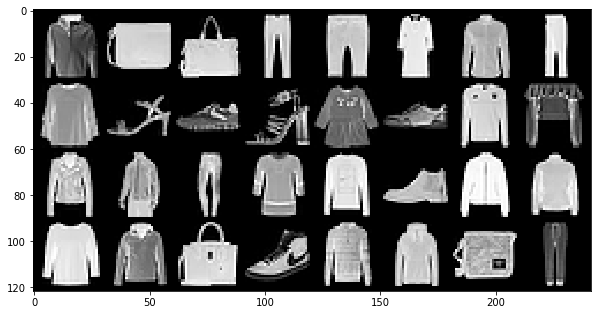

  0%|          | 0/469 [00:00<?, ?it/s]

Step 20000: Generator loss: 1.314937975168229, discriminator loss: 0.46506109374761534


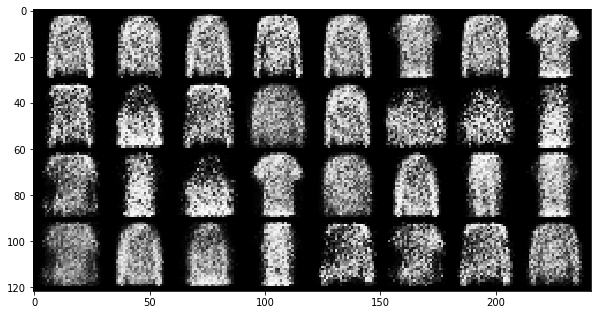

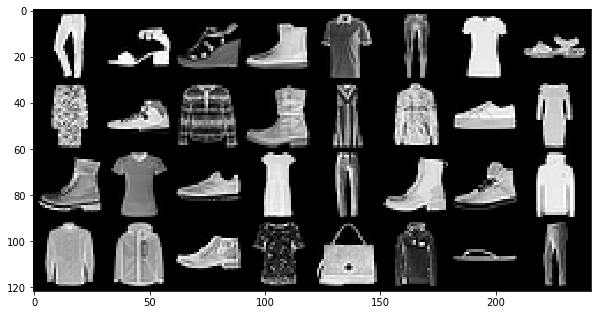

  0%|          | 0/469 [00:00<?, ?it/s]

In [ ]:
current_step = 0 # store current training step
mean_generator_loss = 0 # store mean generator loss for every `display_step` steps 
mean_discriminator_loss = 0 # store mean discriminator loss for every `display_step` steps
for epoch in range(n_epochs):
    for real_images, _ in tqdm(dataloader):
        current_batch_size = len(real_images)
        real_images = real_images.view(current_batch_size, -1).to(device) # flatten images

        # Discriminator training loop
        discriminator_opt.zero_grad()
        discriminator_loss = get_discriminator_loss(generator, discriminator, criterion, real_images, current_batch_size, noise_dim, device)
        discriminator_loss.backward(retain_graph=True)
        discriminator_opt.step()

        # Generator training loop
        # TODO: Start your code here
        generator_opt.zero_grad()
        generator_loss = get_generator_loss(generator, discriminator, criterion, current_batch_size, noise_dim, device)
        generator_loss.backward()
        generator_opt.step()
        # End your code here

        # Compute average discriminator loss per `display_step` steps
        mean_discriminator_loss += discriminator_loss.item() / display_step

        # Compute average generator loss per `display_step` steps
        mean_generator_loss += generator_loss.item() / display_step

        # Visualization
        if current_step % display_step == 0 and current_step > 0:
            print(f"Step {current_step}: Generator loss: {mean_generator_loss}, discriminator loss: {mean_discriminator_loss}")
            fake_noise = get_noise(current_batch_size, noise_dim, device=device)
            fake_images = generator(fake_noise)
            show_images(fake_images, fmnist_shape)
            show_images(real_images, fmnist_shape)
            mean_generator_loss = 0
            mean_discriminator_loss = 0
        current_step += 1